In [1]:
import pandas as pd
import numpy as np
import statistics

In [2]:
df = pd.read_excel("New_TC_DeID_data_1000.xlsx")
df = df.replace({'Age': {"89+": 90}})
df

,TC_ID,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS,ICU LOS,LOS Outlier,Discharge Disposition,Age
0,22,Declined,Gardena Memorial,NaN,False,False,NaN,Med/Surg,NaN,NaN,...,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43,Accepted,Mercy Bakersfield,NaN,True,False,"Surgery, Colorectal",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
2,56,Declined,Kaweah Delta,NaN,False,False,NaN,Med/Surg,Medical Management/Optimization,Home,...,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98,Declined,Valley Presbyterian,NaN,False,False,"Surgery, General- Bariatric",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130,Declined,Inter-Community,Citrus Valley,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48420,Accepted,County Lac Usc,NaN,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,...,NaN,NaN,Female,Fracture/Injury,Medicare,5.0,0.0,NaN,Home Health Org,46.0
996,48457,Declined,Beverly Hospital,NaN,True,False,NaN,Telemetry,Surgical Evaluation/Surgery,ER,...,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,48526,Accepted,Garfield,NaN,False,False,"Surgery, Neurolo- Spine",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0
998,48531,Accepted,Garfield,NaN,False,False,"Surgery, General- Hepato",NaN,NaN,NaN,...,NaN,NaN,NaN,Hepatobiliary Surgery,Medicare,22.0,2.0,Outlier,SNF,86.0


In [3]:
df = df[df['Request Status'] == 'Accepted']
df

,TC_ID,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS,ICU LOS,LOS Outlier,Discharge Disposition,Age
1,43,Accepted,Mercy Bakersfield,NaN,True,False,"Surgery, Colorectal",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
5,155,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,NaN,...,NaN,NaN,Male,Lymphoma,Medicare Managed Care,6.0,3.0,NaN,Acute-Another Hosp,56.0
7,340,Accepted,Bakersfield Memorial,NaN,False,False,"Surgery, Otorhino",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
10,433,Accepted,Norris Cancer Hospital,NaN,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,NaN,...,NaN,NaN,Female,Infectious Disease,Managed Exchange,2.0,2.0,NaN,Expired,53.0
11,440,Accepted,Hollywood Presbyterian,NaN,False,False,Nephrology,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48195,Accepted,Valley Presbyterian,NaN,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,...,NaN,NaN,Female,Other Gi Medicine,Medicaid Managed Care,6.0,0.0,Outlier,Home/Self Care,63.0
991,48256,Accepted,Verdugo Hills,NaN,False,False,Cardiology,Stepdown,NaN,NaN,...,NaN,NaN,Female,Percutaneous Cardiac Procedures,Medicare,2.0,0.0,NaN,Home/Self Care,75.0
995,48420,Accepted,County Lac Usc,NaN,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,...,NaN,NaN,Female,Fracture/Injury,Medicare,5.0,0.0,NaN,Home Health Org,46.0
997,48526,Accepted,Garfield,NaN,False,False,"Surgery, Neurolo- Spine",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0


In [4]:
# Fill the nulls of 'EMTALA Y/N(Patient Status Details)' to "No"
print('Original:')
print(df['EMTALA Y/N(Patient Status Details)'].value_counts())

print('')
df['EMTALA Y/N(Patient Status Details)'].fillna('No', inplace=True)
print('Updated:')
print(df['EMTALA Y/N(Patient Status Details)'].value_counts())

Original:
Yes    7
Name: EMTALA Y/N(Patient Status Details), dtype: int64

Updated:
No     467
Yes      7
Name: EMTALA Y/N(Patient Status Details), dtype: int64


/var/folders/xp/z9lrzhxj58sc25m_9s_qc_3r0000gn/T/ipykernel_15783/1572729542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMTALA Y/N(Patient Status Details)'].fillna('No', inplace=True)


In [5]:
# Fill LOS Outlier as "Not Outlier" if LOS exist
print('Original:')
print(df['LOS Outlier'].value_counts())

print('')
df.loc[(df['LOS'].notnull()) & (df['LOS Outlier'].isnull()), 'LOS Outlier'] = 'Not Outlier'

print('Updated:')
print(df['LOS Outlier'].value_counts())

Original:
Outlier    105
Name: LOS Outlier, dtype: int64

Updated:
Not Outlier    225
Outlier        105
Name: LOS Outlier, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1 to 998
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   TC_ID                                              474 non-null    int64  
 1   Request Status                                     474 non-null    object 
 2   Transfer Referral Source                           474 non-null    object 
 3   County                                             74 non-null     object 
 4   Transfer Back Agreement                            474 non-null    bool   
 5   LOA (Mark X if Yes)                                474 non-null    bool   
 6   Accepting Physician Specialty                      473 non-null    object 
 7   Required Level Of Care                             295 non-null    object 
 8   Requested Treatment Intervention                   174 non-null    object 
 9   From Where

In [7]:
df.describe()

,TC_ID,LOS,ICU LOS,Age
count,474.000000,330.000000,330.000000,471.000000
mean,23446.607595,10.042424,3.475758,58.513800
std,14189.722432,13.902768,10.445736,17.159679
min,43.000000,1.000000,0.000000,18.000000
25%,11013.250000,3.000000,0.000000,46.000000
50%,22680.000000,6.000000,0.000000,60.000000
75%,35168.250000,11.000000,2.750000,71.000000
max,48531.000000,132.000000,132.000000,90.000000


In [8]:
TRS_unique = df['Transfer Referral Source'].unique()
print(np.sort(TRS_unique))

['Adventist Health Bakersfield' 'Antelope Valley Hospital'
 'Bakersfield Memorial' 'Beverly Hospital' 'California Hospital'
 'Centinela' 'County Lac Usc' 'Gardena Memorial' 'Garfield'
 'Glendale Adventist' 'Hollywood Presbyterian' 'Huntington Memorial'
 'Huntington Park Community' 'Inter-Community' 'Kaweah Delta' 'Kern'
 'Martin Luther King' 'Mercy Bakersfield' 'Methodist Hospital'
 'Norris Cancer Hospital' 'Northridge' 'Pih Hospital'
 'Presbyterian Intercommunity (Pih)' 'Queen Of The Valley'
 'Riverside Community' 'St. Francis' "St. Mary'S" 'Valley Presbyterian'
 'Ventura County Medical Center' 'Verdugo Hills' 'White Memorial'
 'Whittier Medical Center']


In [9]:
# Gender_unique = df['Gender'].unique()
# np.sort(Gender_unique)

In [10]:
df_nullity = df.isnull()
df_nullity.head()

,TC_ID,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS,ICU LOS,LOS Outlier,Discharge Disposition,Age
1,False,False,False,True,False,False,False,True,True,True,...,False,True,True,True,True,True,True,True,True,False
5,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,True,True,True,...,False,True,True,True,True,True,True,True,True,False
10,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
11,False,False,False,True,False,False,False,True,True,True,...,False,True,True,True,True,True,True,True,True,False


In [11]:
df_nullity.sum()

TC_ID                                                  0
Request Status                                         0
Transfer Referral Source                               0
County                                               400
Transfer Back Agreement                                0
LOA (Mark X if Yes)                                    0
Accepting Physician Specialty                          1
Required Level Of Care                               179
Requested Treatment Intervention                     300
From Where Patient Admitted to Referring Facility    334
Infection Precaution                                 447
Patient Status                                       221
EMTALA Y/N(Patient Status Details)                     0
Special Considerations                               472
Gender                                               220
DRG Program                                          144
Payor                                                144
LOS                            

In [12]:
df_nullity.mean()*100

TC_ID                                                 0.000000
Request Status                                        0.000000
Transfer Referral Source                              0.000000
County                                               84.388186
Transfer Back Agreement                               0.000000
LOA (Mark X if Yes)                                   0.000000
Accepting Physician Specialty                         0.210970
Required Level Of Care                               37.763713
Requested Treatment Intervention                     63.291139
From Where Patient Admitted to Referring Facility    70.464135
Infection Precaution                                 94.303797
Patient Status                                       46.624473
EMTALA Y/N(Patient Status Details)                    0.000000
Special Considerations                               99.578059
Gender                                               46.413502
DRG Program                                          30

In [13]:
#conda install -c conda-forge/label/gcc7 missingno

In [14]:
import missingno as msno

<AxesSubplot:>

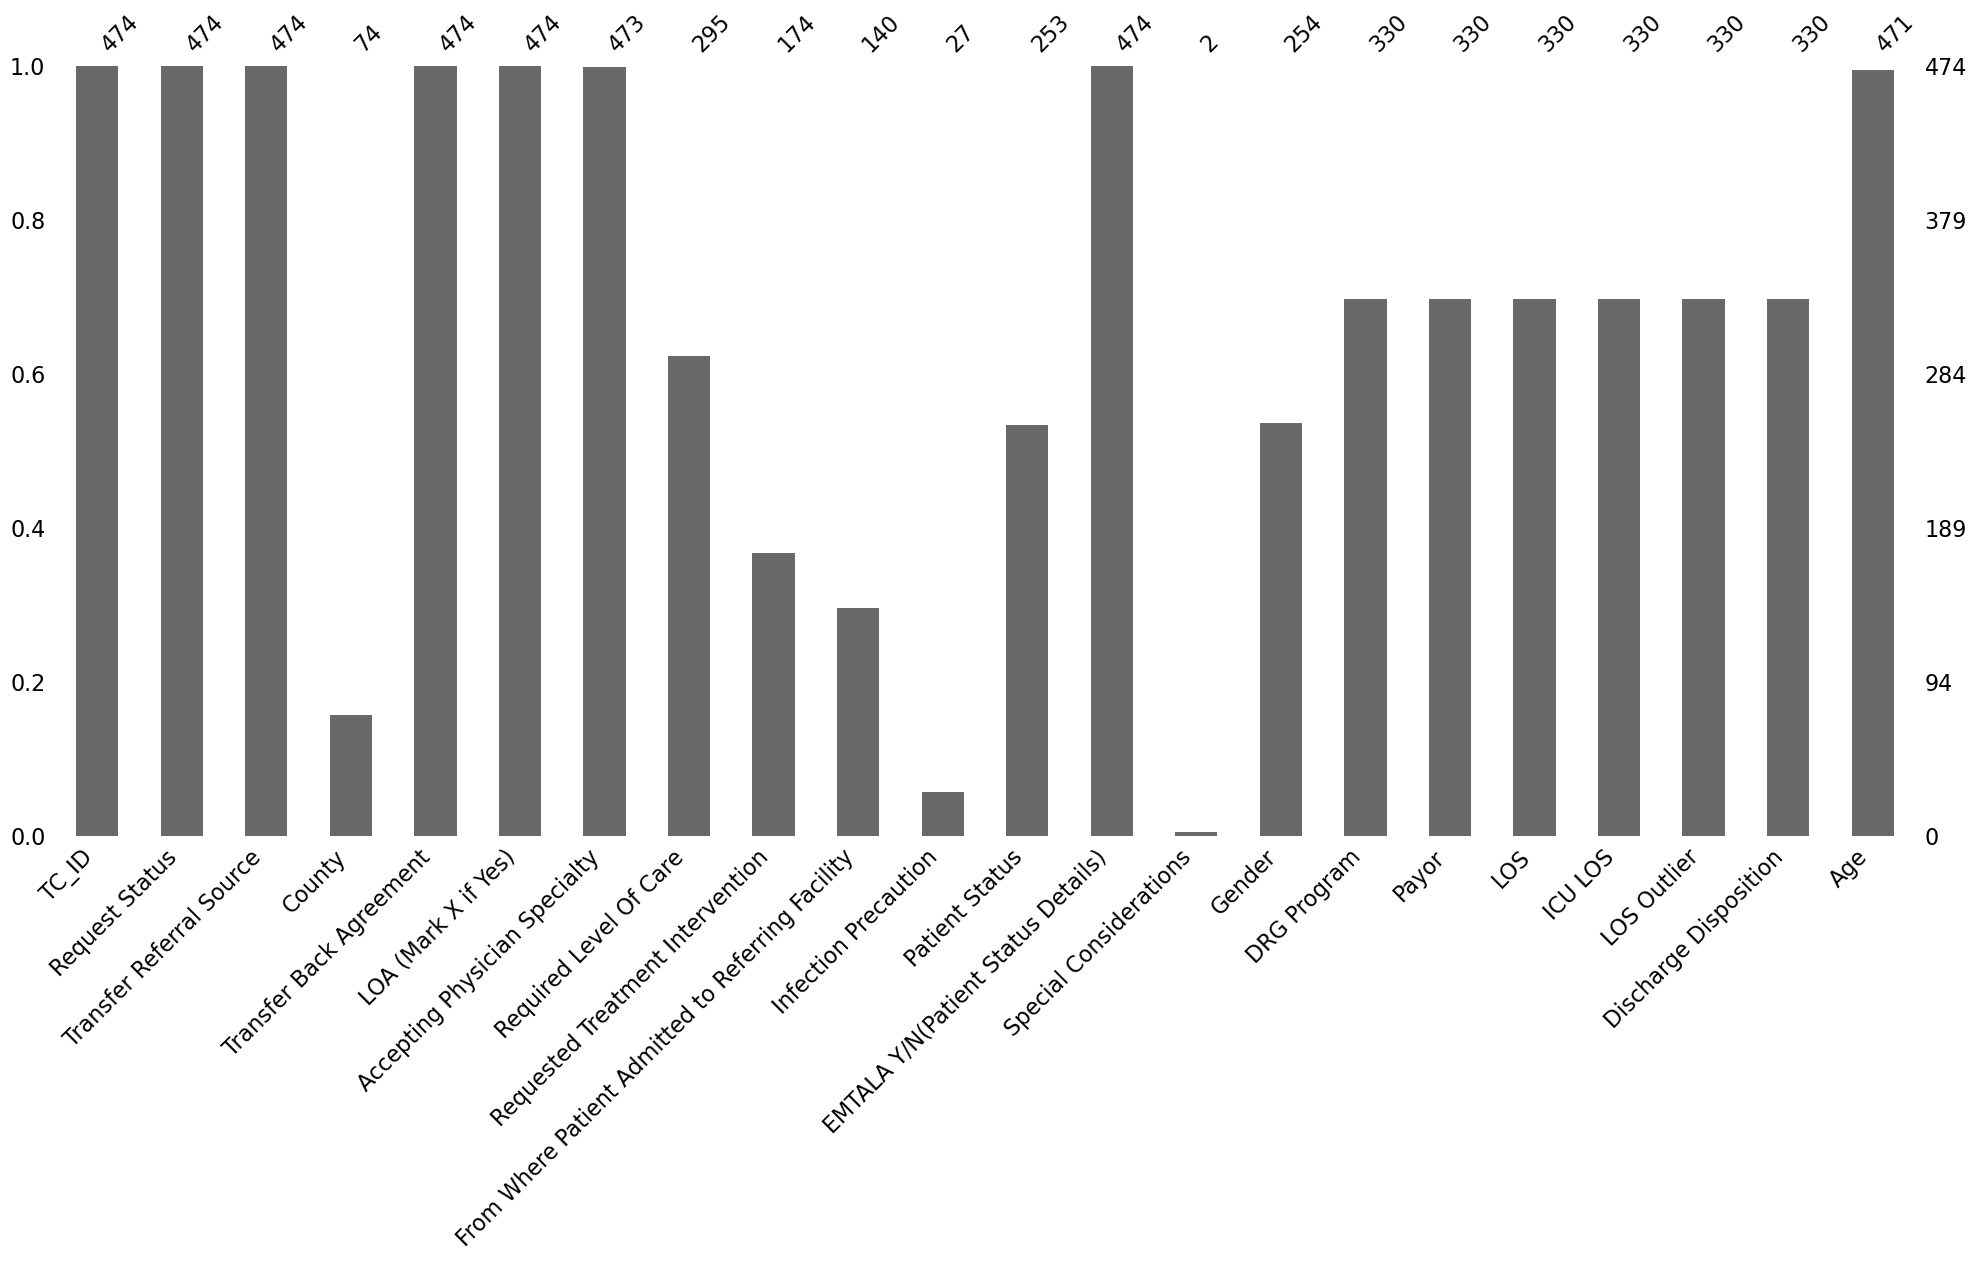

In [15]:
msno.bar(df)

<AxesSubplot:>

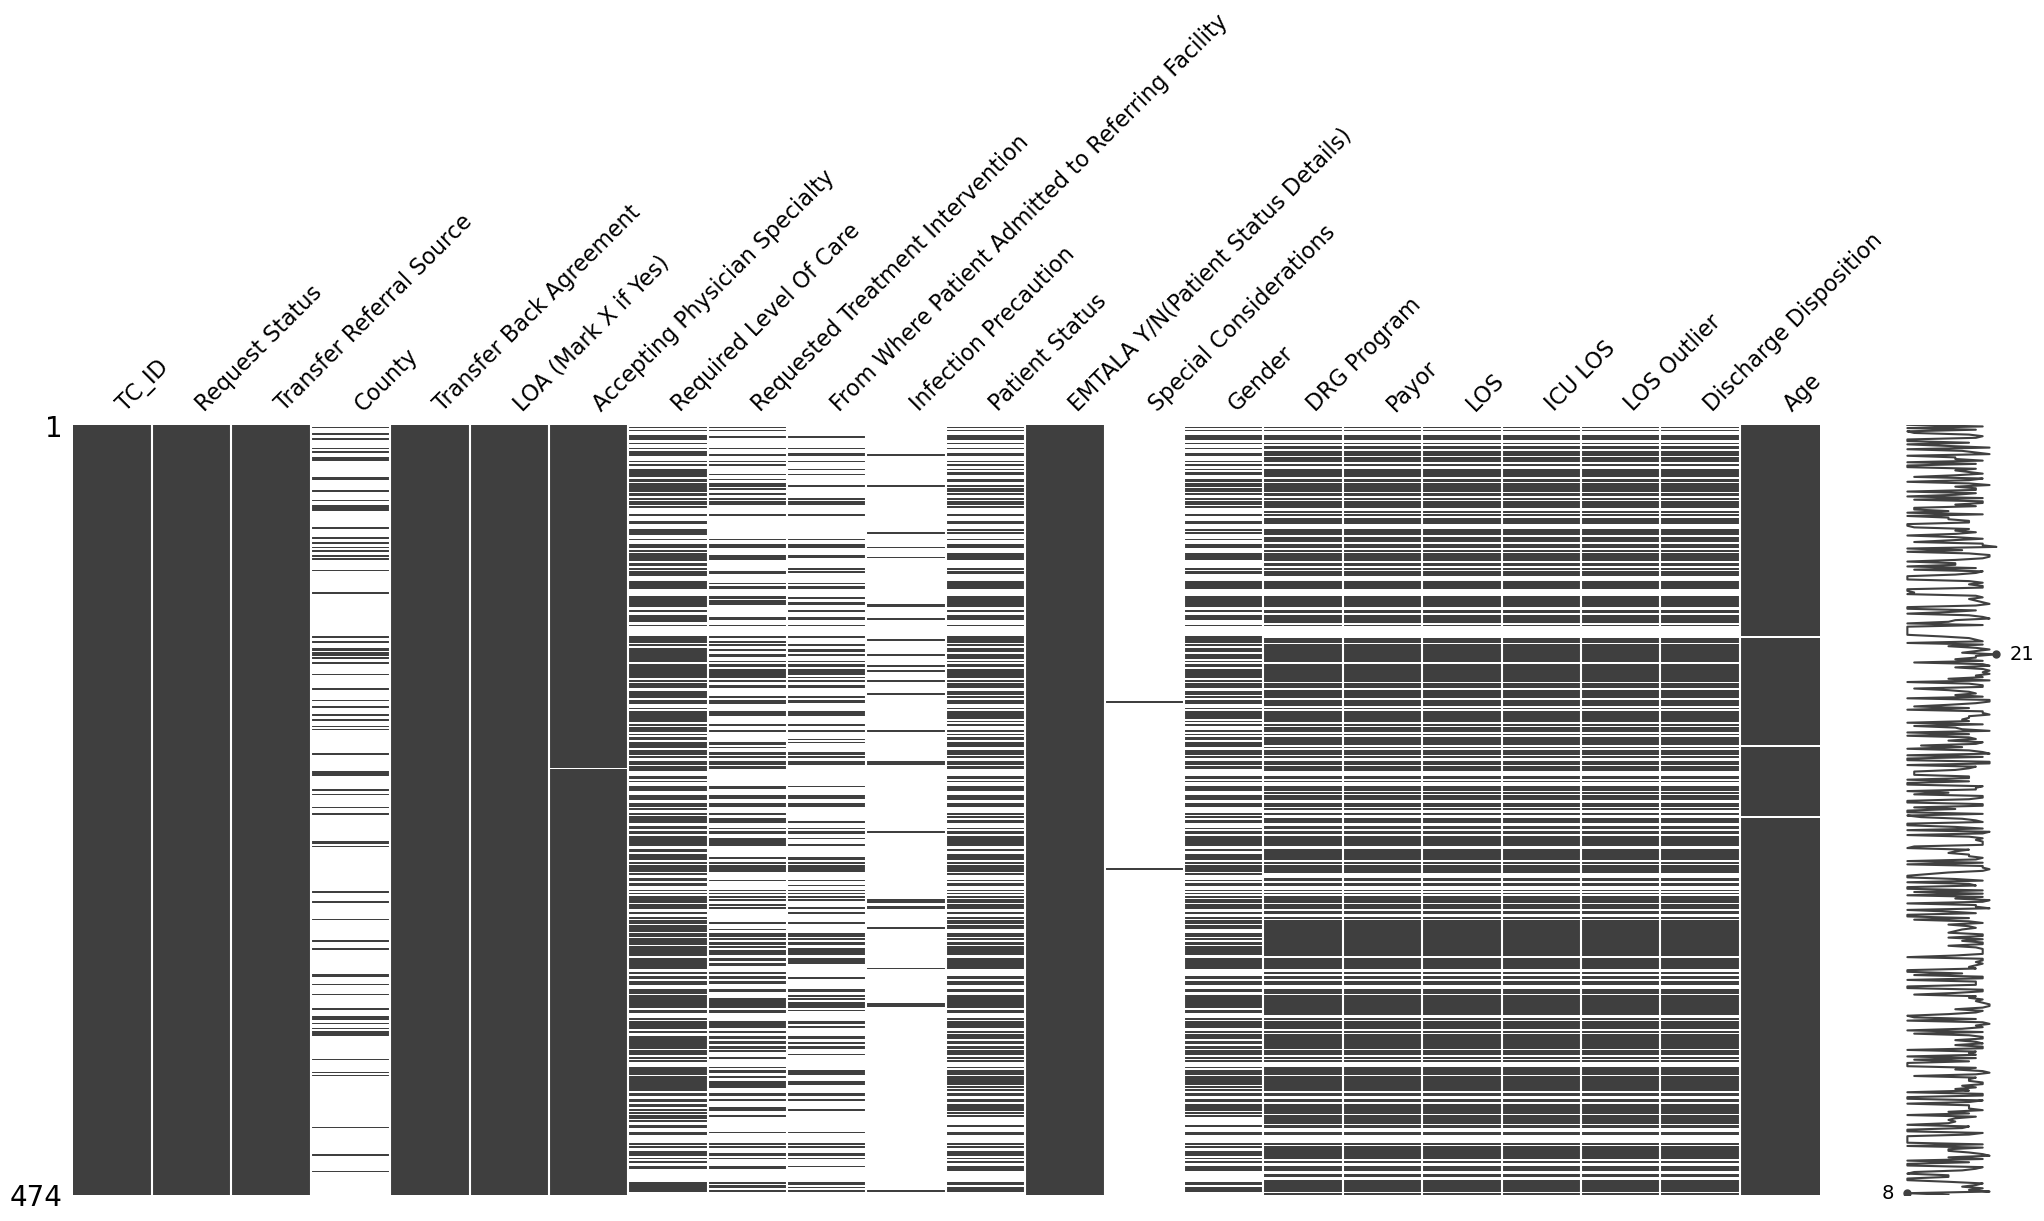

In [16]:
msno.matrix(df)

In [17]:
# minimun number of null values is 21
# total count of columns is 5

In [18]:
# Only a few is missing may suggest missing completely at random
# missing a few can be missing at random

<AxesSubplot:>

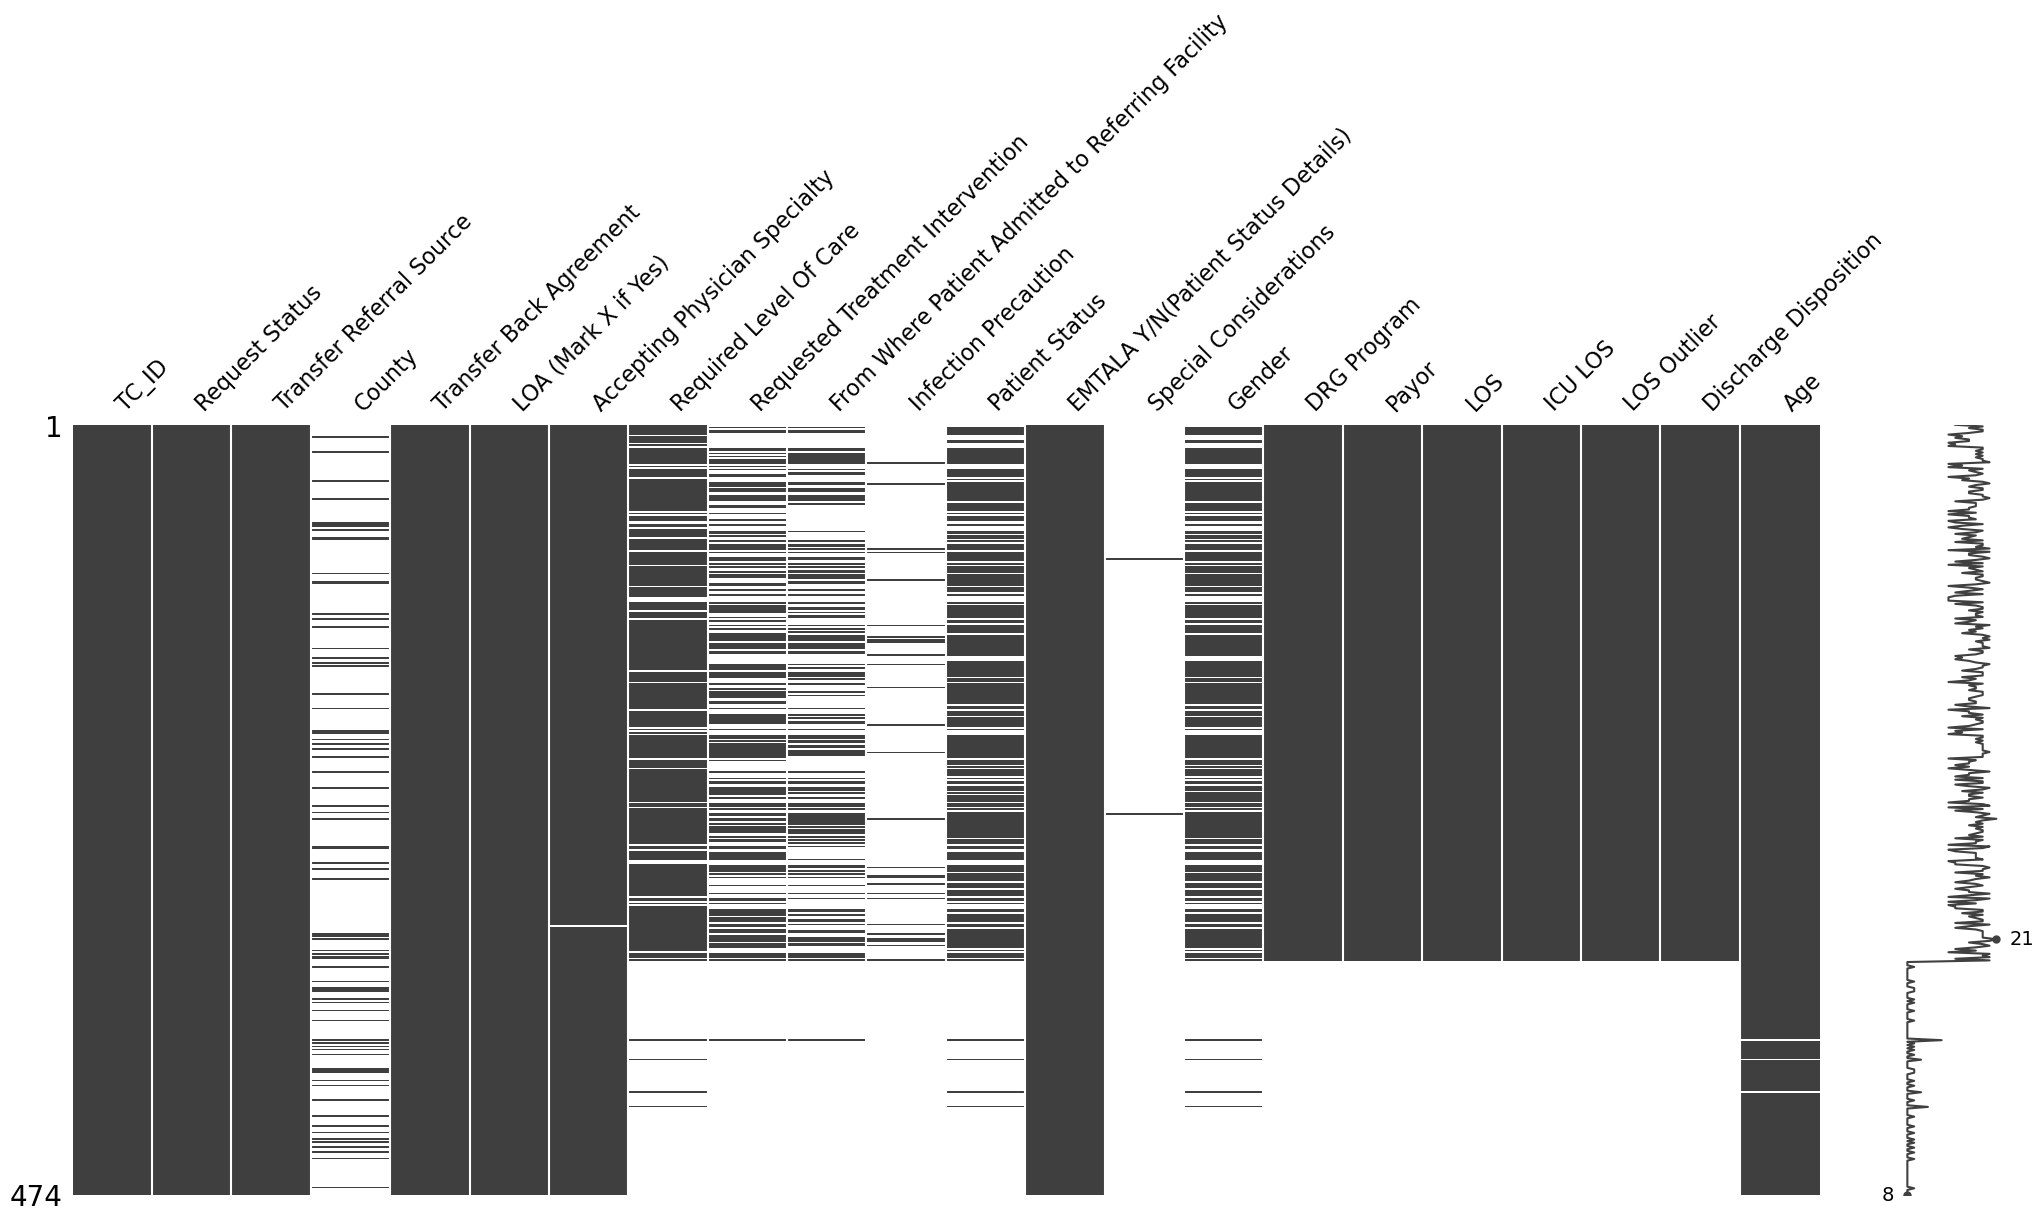

In [19]:
sorted_values = df.sort_values("LOS")
msno.matrix(sorted_values)

### Finding patterns in missing data

<AxesSubplot:>

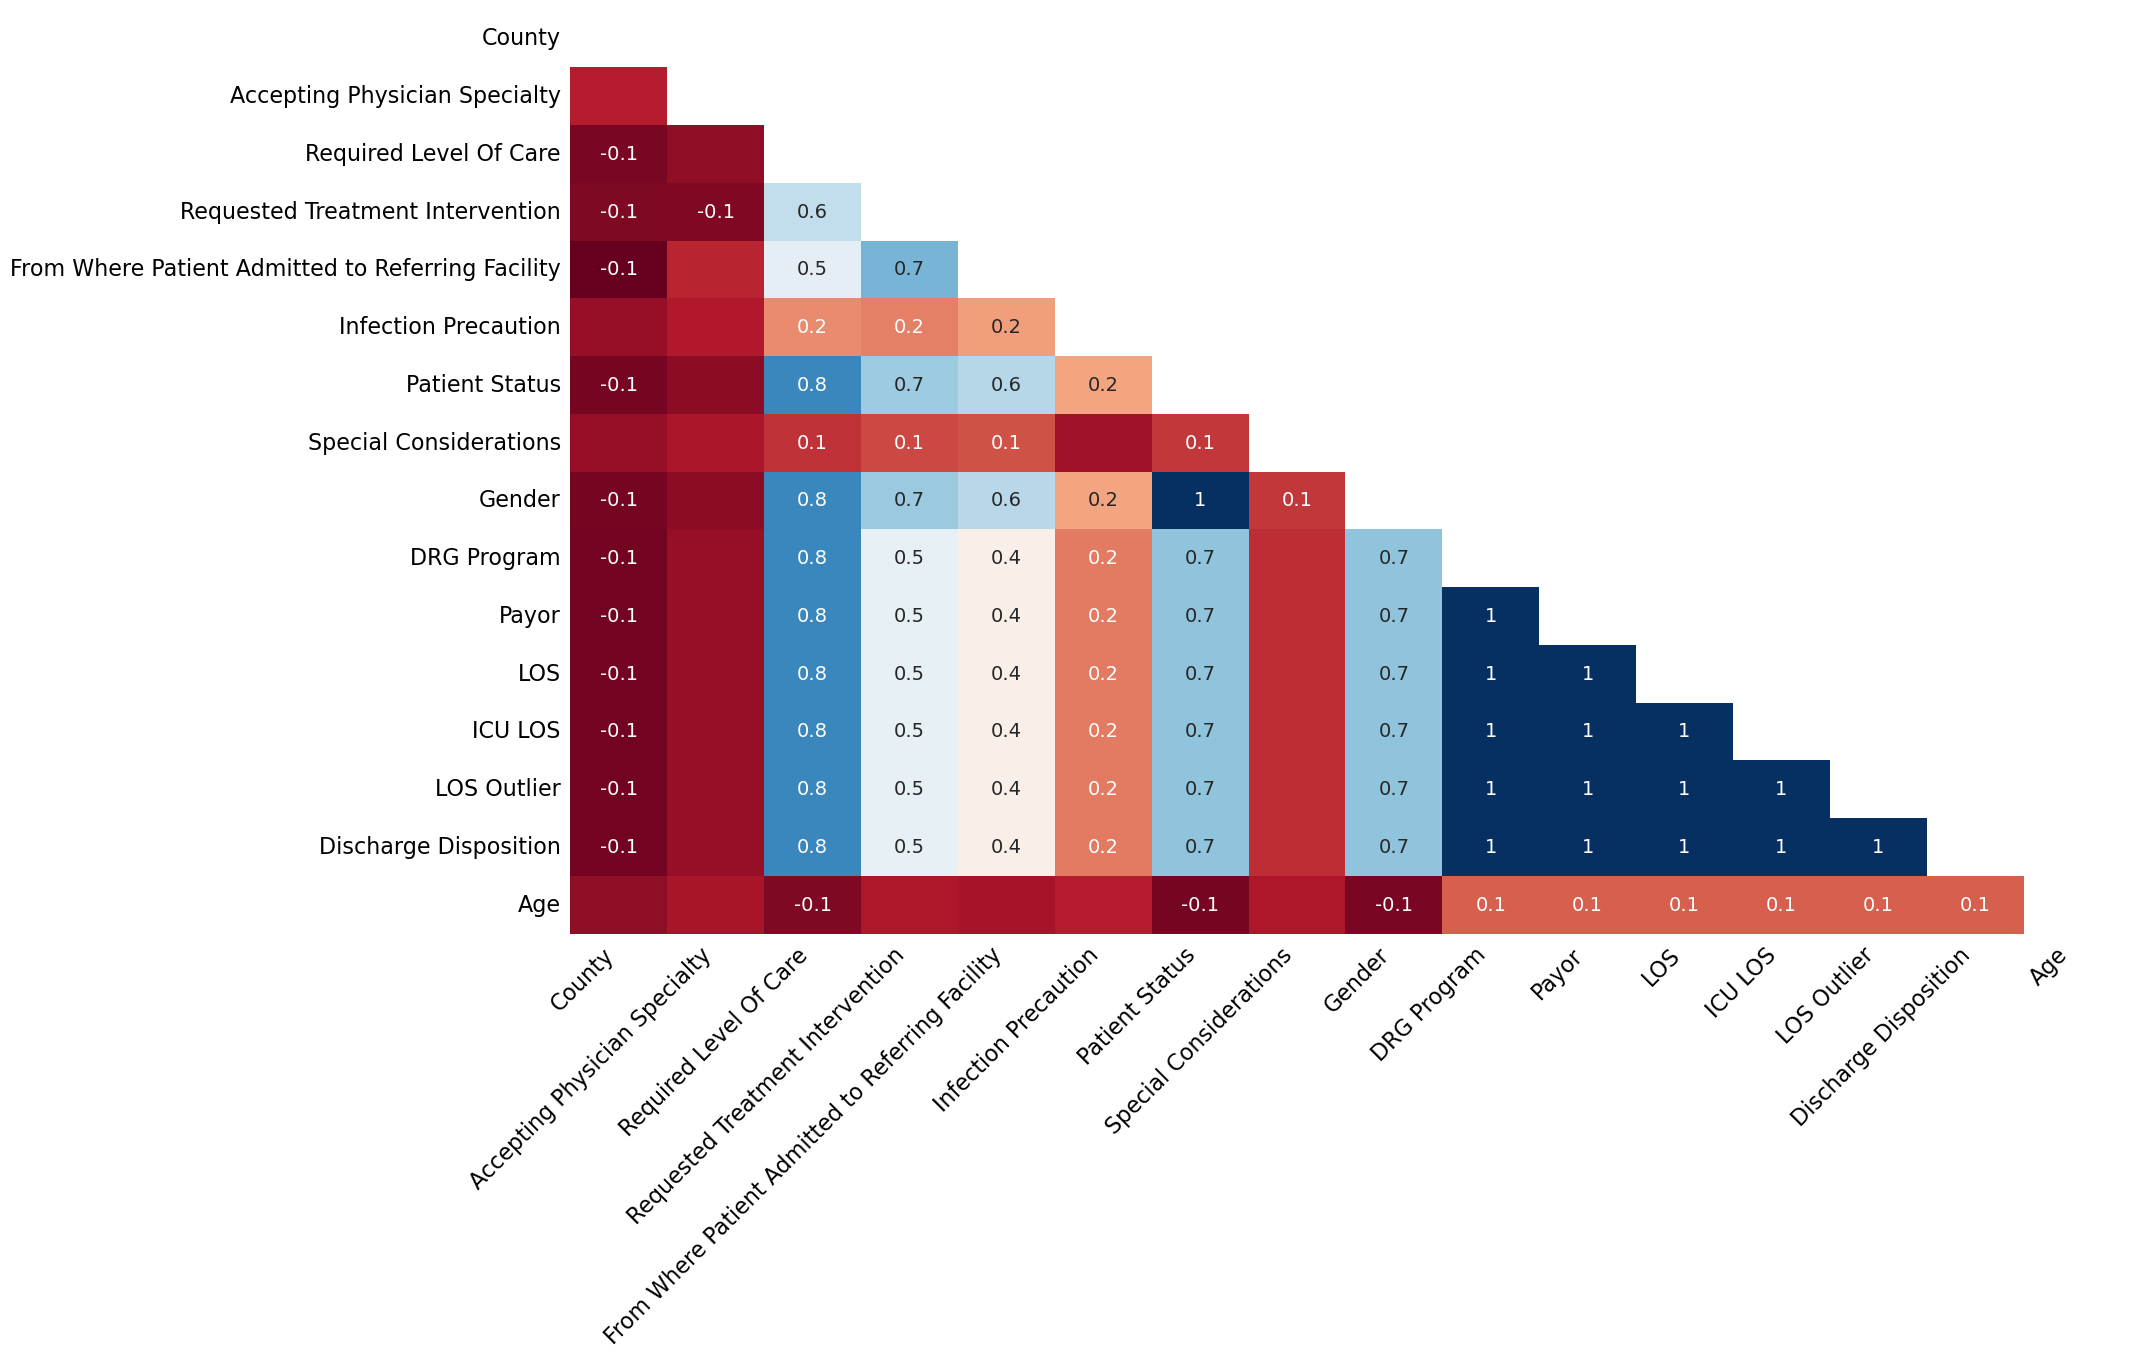

In [20]:
# heatmap
msno.heatmap(df)

In [21]:
# the redder the color, the lower the correlation between the missing values of columns
# the bluer it is, the higher the correlation of missingness

In [22]:
# Payor & DRG Program
# LOS & DRG Program, Payor
# ICU LOS & DRG Program, Payor, LOS
# LOS Outlier & DRG Program, Payor LOS, ICU LOS
# Discharge Disposition & DRG Program, Payor LOS, ICU LOS, ICU Outlier

In [23]:
# Gender & Patient Stauts

<AxesSubplot:>

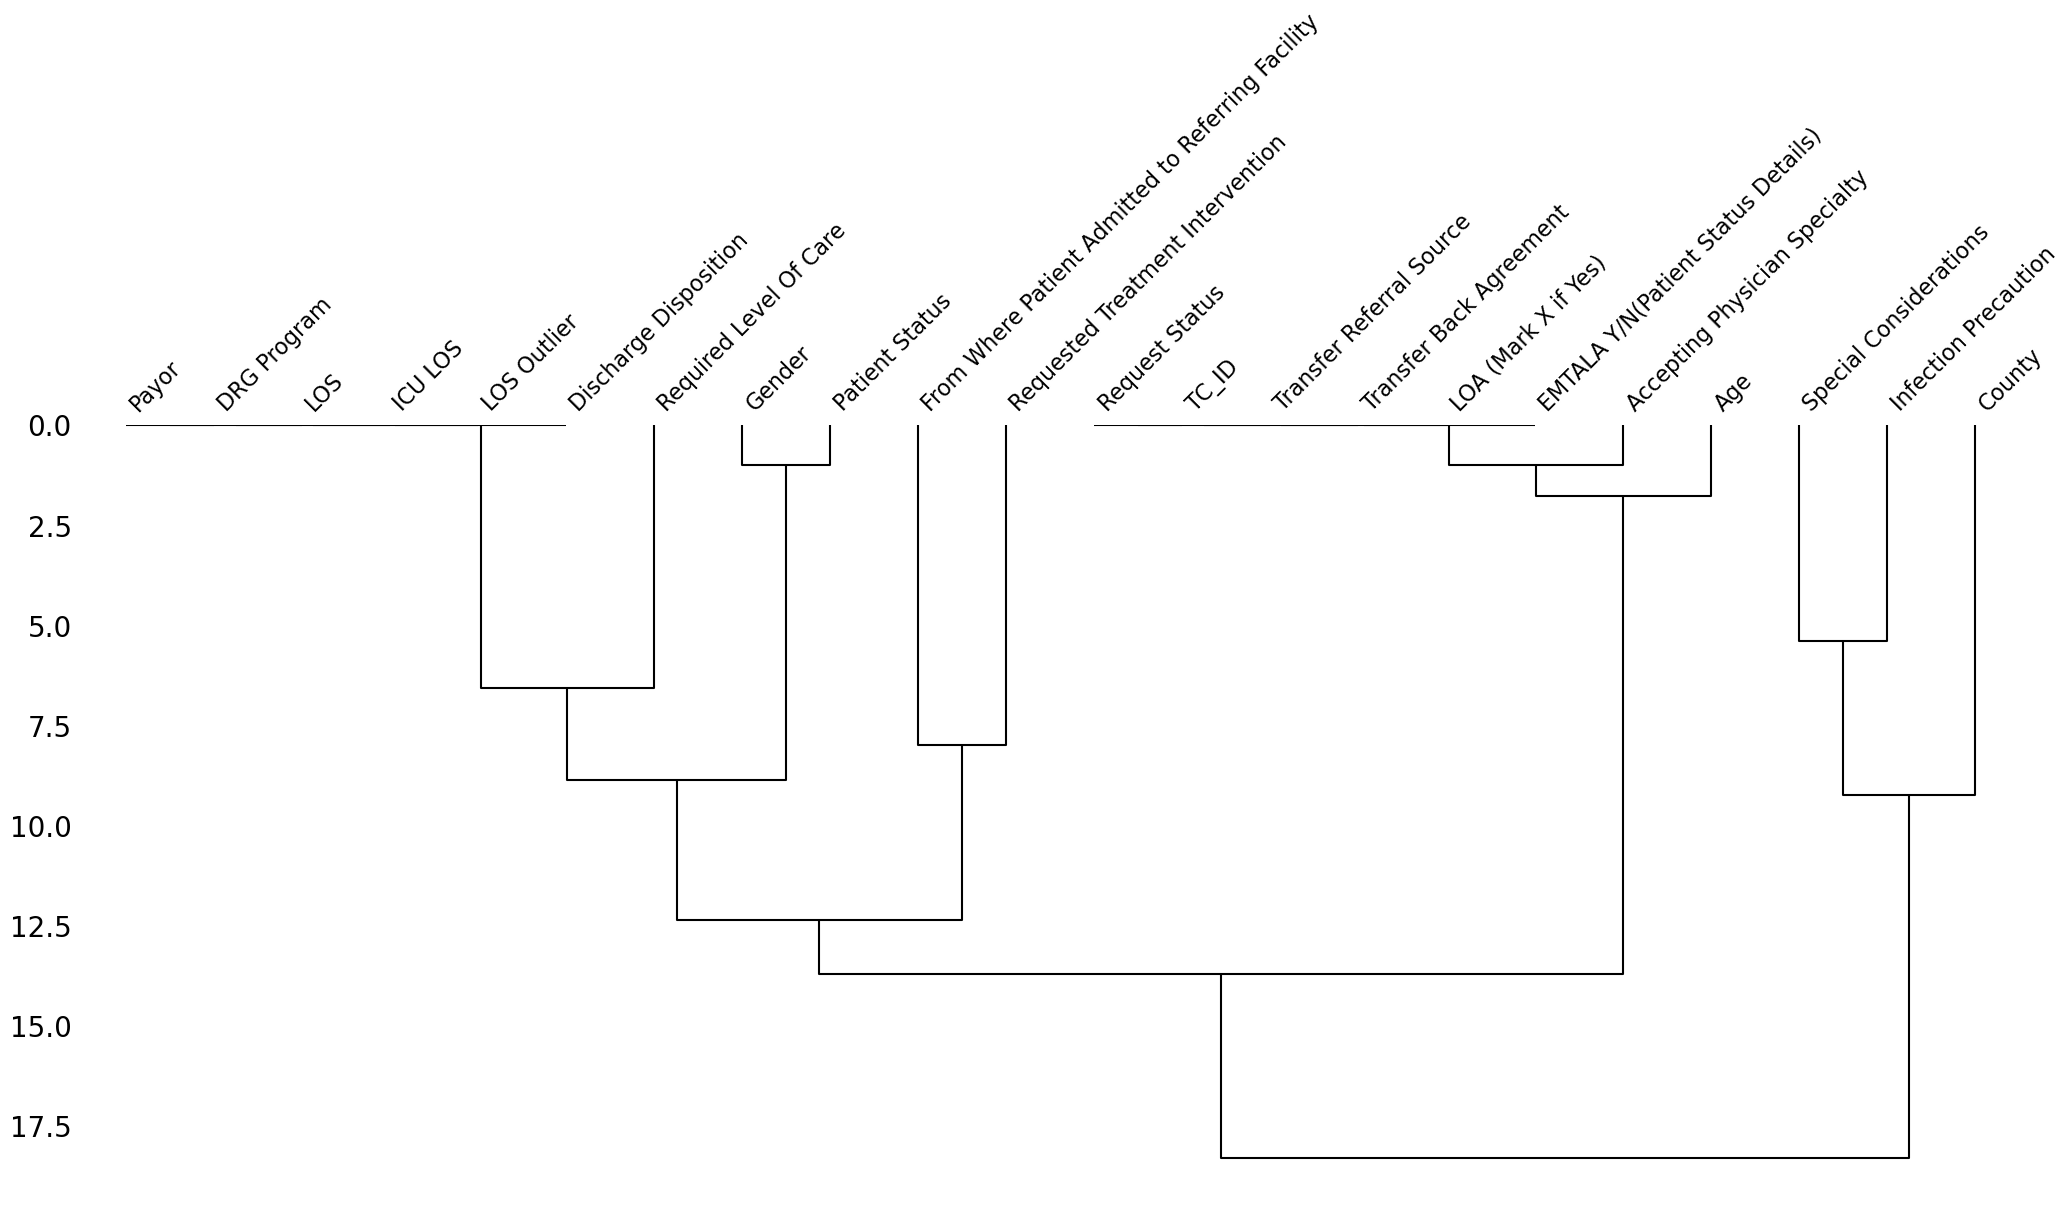

In [24]:
# tree diagram
msno.dendrogram(df)

In [25]:
# cluster leaves are linked together at a distance of zero 
# variable might always be empty while another is filled, or they might always both be filled or both empty

In [26]:
from numpy.random import rand

In [27]:
def fill_dummy_values(df, scaling_factor):
    # create copy of dataframe
    df_dummy = df.copy(deep=True)
    # iterate over each column
    for col in df_dummy:
        # get column, column missing values and range
        col = df_dummy[col]
        col_null = col.isnull()
        num_nulls = col_null.sum()
        col_range = col.max() - col.min()
        
        # shift and scal dummy values
        dummy_values = (rand(num_nulls) -2)
        dummy_values = dummy_values * scaling_factor * col_range + col.min()
        
        # return dummy values
        col[col_null] = dummy_values
    return df_dummy

In [28]:
df_numeric = df[['Age','LOS', 'ICU LOS']]

<AxesSubplot:xlabel='LOS', ylabel='Age'>

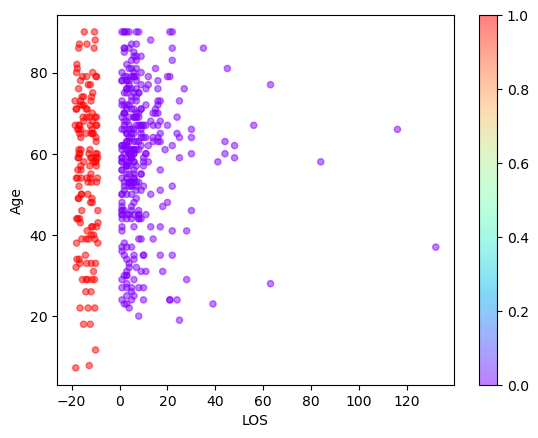

In [29]:
# create dummy dataframe
# df_age_los = df[['LOS',"Age"]]
df_dummy = fill_dummy_values(df_numeric, 0.075)

# get missing values for both columns for coloring
nullity = df['LOS'].isnull() + df['Age'].isnull()

# generate scatter plot
df_dummy.plot(x='LOS', y = "Age", kind = "scatter", alpha = 0.5, c = nullity, cmap ='rainbow')

In [30]:
# not missing values in purple, missing values in red

In [31]:
age_null = df["Age"].isnull()
num_nuls = age_null.sum()
# generate random values
dummy_values = rand(num_nuls)
# to make sure the random values always lower than actual value
# shift to -2 & -1
dummy_values = dummy_values -2
# scale to 0.075 of column range
age_range =df["Age"].max() - df["Age"].min()
dummy_values = dummy_values * 0.075 * age_range

In [32]:
# Pairwise deletion for MCAR: skip row with missing values
# Listwise deletion: only when the amount of missing values is small
# df.dropna(subset = ['Age'], how = 'any', inplace = True)

In [33]:
# Mean/Medium Imputation
from sklearn.impute import SimpleImputer
df_numeric_mean = df_numeric.copy(deep=True)
mean_imputer = SimpleImputer(strategy = 'mean')
df_numeric_mean.iloc[:,:] = mean_imputer.fit_transform(df_numeric_mean)

In [34]:
df_numeric_medium = df_numeric.copy(deep=True)
mean_imputer = SimpleImputer(strategy = 'median')
df_numeric_medium.iloc[:,:] = mean_imputer.fit_transform(df_numeric_medium)

In [35]:
df_numeric_mode = df_numeric.copy(deep=True)
mean_imputer = SimpleImputer(strategy = 'most_frequent')
df_numeric_mode.iloc[:,:] = mean_imputer.fit_transform(df_numeric_mode)

/Users/stella/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [36]:
df_numeric_constant = df_numeric.copy(deep=True)
mean_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
df_numeric_constant.iloc[:,:] = mean_imputer.fit_transform(df_numeric_constant)

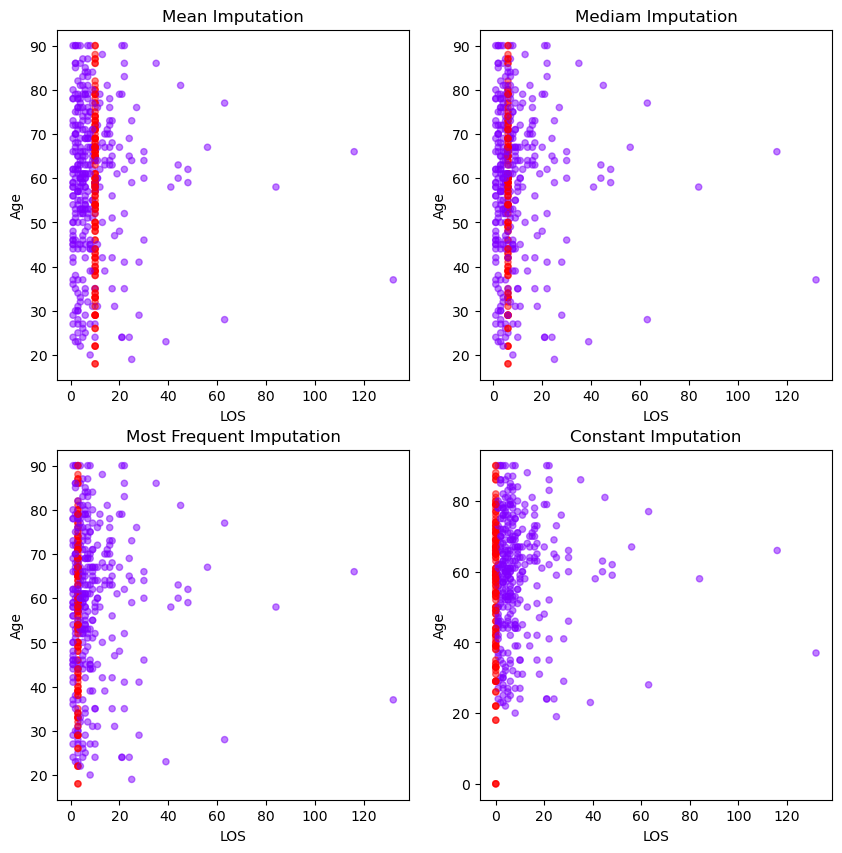

In [37]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
nullity = df['LOS'].isnull() + df['Age'].isnull()
imputations = {'Mean Imputation': df_numeric_mean,
              'Mediam Imputation': df_numeric_medium,
              'Most Frequent Imputation': df_numeric_mode,
              'Constant Imputation': df_numeric_constant}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x="LOS", y ='Age', kind = "scatter", alpha = 0.5,
                            c = nullity, cmap = 'rainbow', ax=ax, colorbar = False,
                            title = df_key)

In [38]:
# did not consider the correlations
# may contain bias

In [39]:
# replace Nans with last observed value
df_fill = df.copy(deep = True)
df_fill.fillna(method = 'ffill', inplace = True)
df_fill

,TC_ID,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS,ICU LOS,LOS Outlier,Discharge Disposition,Age
1,43,Accepted,Mercy Bakersfield,NaN,True,False,"Surgery, Colorectal",NaN,NaN,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
5,155,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,NaN,...,No,NaN,Male,Lymphoma,Medicare Managed Care,6.0,3.0,Not Outlier,Acute-Another Hosp,56.0
7,340,Accepted,Bakersfield Memorial,Whittier,False,False,"Surgery, Otorhino",Med/Surg,Medical Management/Optimization,NaN,...,No,NaN,Male,Lymphoma,Medicare Managed Care,6.0,3.0,Not Outlier,Acute-Another Hosp,60.0
10,433,Accepted,Norris Cancer Hospital,Whittier,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,NaN,...,No,NaN,Female,Infectious Disease,Managed Exchange,2.0,2.0,Not Outlier,Expired,53.0
11,440,Accepted,Hollywood Presbyterian,Whittier,False,False,Nephrology,ICU,Surgical Evaluation/Surgery,NaN,...,No,NaN,Female,Infectious Disease,Managed Exchange,2.0,2.0,Not Outlier,Expired,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48195,Accepted,Valley Presbyterian,Downey,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,...,No,Bloodless,Female,Other Gi Medicine,Medicaid Managed Care,6.0,0.0,Outlier,Home/Self Care,63.0
991,48256,Accepted,Verdugo Hills,Downey,False,False,Cardiology,Stepdown,Surgical Evaluation/Surgery,ER,...,No,Bloodless,Female,Percutaneous Cardiac Procedures,Medicare,2.0,0.0,Not Outlier,Home/Self Care,75.0
995,48420,Accepted,County Lac Usc,Downey,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,...,No,Bloodless,Female,Fracture/Injury,Medicare,5.0,0.0,Not Outlier,Home Health Org,46.0
997,48526,Accepted,Garfield,Downey,False,False,"Surgery, Neurolo- Spine",Med/Surg,Surgical Evaluation/Surgery,Home,...,No,Bloodless,Female,Fracture/Injury,Medicare,5.0,0.0,Not Outlier,Home Health Org,49.0


### KNN or K-Nearest Neighbor

In [40]:
from fancyimpute import KNN
knn_imputer = KNN()
df_numeric_knn = df_numeric.copy(deep = True)
df_numeric_knn.iloc[:,:] = knn_imputer.fit_transform(df_numeric_knn)

Imputing row 1/474 with 2 missing, elapsed time: 0.020
Imputing row 101/474 with 0 missing, elapsed time: 0.021
Imputing row 201/474 with 0 missing, elapsed time: 0.022
Imputing row 301/474 with 0 missing, elapsed time: 0.023
Imputing row 401/474 with 2 missing, elapsed time: 0.024
[KNN] Warning: 9/1422 still missing after imputation, replacing with 0


In [41]:
df_numeric_knn

,Age,LOS,ICU LOS
1,78.0,5.000000,3.200000
5,56.0,6.000000,3.000000
7,60.0,12.000000,8.200000
10,53.0,2.000000,2.000000
11,42.0,9.250005,1.000001
...,...,...,...
989,63.0,6.000000,0.000000
991,75.0,2.000000,0.000000
995,46.0,5.000000,0.000000
997,49.0,7.000007,0.000009


### Mice or Multiple Imputation by Chained Equatior

In [42]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_numeric_mice = df_numeric.copy(deep=True)
df_numeric_mice.iloc[:,:] = MICE_imputer.fit_transform(df_numeric_mice)
df_numeric_mice

,Age,LOS,ICU LOS
1,78.0,9.830506,3.002536
5,56.0,6.000000,3.000000
7,60.0,10.033178,3.455110
10,53.0,2.000000,2.000000
11,42.0,10.235850,3.907683
...,...,...,...
989,63.0,6.000000,0.000000
991,75.0,2.000000,0.000000
995,46.0,5.000000,0.000000
997,49.0,10.157033,3.731682


In [43]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1 to 998
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      471 non-null    float64
 1   LOS      330 non-null    float64
 2   ICU LOS  330 non-null    float64
dtypes: float64(3)
memory usage: 14.8 KB


In [44]:
df_numeric_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1 to 998
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      474 non-null    float64
 1   LOS      474 non-null    float64
 2   ICU LOS  474 non-null    float64
dtypes: float64(3)
memory usage: 14.8 KB


In [45]:
df_numeric_mice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1 to 998
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      474 non-null    float64
 1   LOS      474 non-null    float64
 2   ICU LOS  474 non-null    float64
dtypes: float64(3)
memory usage: 14.8 KB


In [46]:
# Imputinng categorical values

In [47]:
# Conversion techniques: one-hot encoder or ordinal encoder

In [48]:
df_category = df.loc[:, ~df.columns.isin(['Age','LOS', 'ICU LOS','TC_ID'])]
df_category.head()

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,Patient Status,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition
1,Accepted,Mercy Bakersfield,NaN,True,False,"Surgery, Colorectal",NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
5,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,NaN,NaN,Inpatient,No,NaN,Male,Lymphoma,Medicare Managed Care,Not Outlier,Acute-Another Hosp
7,Accepted,Bakersfield Memorial,NaN,False,False,"Surgery, Otorhino",NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
10,Accepted,Norris Cancer Hospital,NaN,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,NaN,NaN,Inpatient,No,NaN,Female,Infectious Disease,Managed Exchange,Not Outlier,Expired
11,Accepted,Hollywood Presbyterian,NaN,False,False,Nephrology,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1 to 998
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Request Status                                     474 non-null    object
 1   Transfer Referral Source                           474 non-null    object
 2   County                                             74 non-null     object
 3   Transfer Back Agreement                            474 non-null    bool  
 4   LOA (Mark X if Yes)                                474 non-null    bool  
 5   Accepting Physician Specialty                      473 non-null    object
 6   Required Level Of Care                             295 non-null    object
 7   Requested Treatment Intervention                   174 non-null    object
 8   From Where Patient Admitted to Referring Facility  140 non-null    object
 9   Infection Precaution 

### Ordinal Encoding

In [50]:
from sklearn.preprocessing import OrdinalEncoder
# create ordinal encoder
# ord_enc = OrdinalEncoder()

# # select non-null values in ambience
# Patient_Status = df_category['Patient Status']
# Patient_Status_not_null = Patient_Status[Patient_Status.notnull()]
# reshaped_vals = Patient_Status_not_null.values.reshape(-1,1)

# # encode the non-null values of ambience
# encoded_vals = ord_enc.fit_transform(reshaped_vals)

# # replace the column with ordinal values
# df_category.loc[Patient_Status.notnull(),'Patient Status'] = np.squeeze(encoded_vals)
# df_category['Patient Status']

In [51]:
# create dictionary for ordinal encoders
ordinal_enc_dict = {}
df_category_encoded = df_category.copy(deep = True)

# loop over columns to encode
for col_name in df_category:
    # create ordinal encoder
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = df_category[col_name]

    # select non-null values in ambience
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1,1)

    # encode the non-null values of ambience
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)

    # replace the column with ordinal values
    df_category_encoded.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [52]:
df_category_encoded

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,Patient Status,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition
1,0.0,17.0,NaN,1.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,22.0,4.0,1.0,0.0,10.0,1.0,1.0,NaN,NaN,1.0,0.0,NaN,1.0,40.0,5.0,0.0,0.0
7,0.0,2.0,NaN,0.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10,0.0,19.0,NaN,0.0,0.0,28.0,0.0,4.0,NaN,NaN,1.0,0.0,NaN,0.0,33.0,1.0,0.0,1.0
11,0.0,10.0,NaN,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,0.0,27.0,NaN,1.0,0.0,6.0,3.0,4.0,2.0,NaN,1.0,0.0,NaN,0.0,46.0,3.0,1.0,3.0
991,0.0,29.0,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,52.0,4.0,0.0,3.0
995,0.0,6.0,NaN,1.0,0.0,22.0,1.0,4.0,3.0,4.0,1.0,0.0,NaN,0.0,22.0,4.0,0.0,2.0
997,0.0,8.0,NaN,0.0,0.0,21.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Imputing with KNN

In [53]:
df_category_encoded_KNN = df_category_encoded.copy(deep = True)

# create KNN imputer
KNN_imputer = KNN()

# impute using knn and round to 0 decimal place
df_category_encoded_KNN.iloc[:,:] = np.round(KNN_imputer.fit_transform(df_category_encoded_KNN))

Imputing row 1/474 with 12 missing, elapsed time: 0.032
Imputing row 101/474 with 3 missing, elapsed time: 0.038
Imputing row 201/474 with 5 missing, elapsed time: 0.042
Imputing row 301/474 with 4 missing, elapsed time: 0.047
Imputing row 401/474 with 11 missing, elapsed time: 0.052


In [54]:
df_category_encoded_KNN

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,Patient Status,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition
1,0.0,17.0,1.0,1.0,0.0,16.0,3.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0,17.0,3.0,0.0,4.0
5,0.0,22.0,4.0,1.0,0.0,10.0,1.0,1.0,2.0,3.0,1.0,0.0,1.0,1.0,40.0,5.0,0.0,0.0
7,0.0,2.0,2.0,0.0,0.0,24.0,3.0,4.0,3.0,7.0,0.0,0.0,1.0,0.0,44.0,3.0,0.0,2.0
10,0.0,19.0,3.0,0.0,0.0,28.0,0.0,4.0,2.0,5.0,1.0,0.0,1.0,0.0,33.0,1.0,0.0,1.0
11,0.0,10.0,2.0,0.0,0.0,7.0,3.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,39.0,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,0.0,27.0,3.0,1.0,0.0,6.0,3.0,4.0,2.0,3.0,1.0,0.0,1.0,0.0,46.0,3.0,1.0,3.0
991,0.0,29.0,1.0,0.0,0.0,0.0,2.0,4.0,3.0,4.0,0.0,0.0,1.0,0.0,52.0,4.0,0.0,3.0
995,0.0,6.0,2.0,1.0,0.0,22.0,1.0,4.0,3.0,4.0,1.0,0.0,1.0,0.0,22.0,4.0,0.0,2.0
997,0.0,8.0,2.0,0.0,0.0,21.0,1.0,3.0,3.0,4.0,1.0,0.0,0.0,1.0,24.0,2.0,1.0,8.0


In [55]:
# convert back to ordinal values
for col in df_category_encoded_KNN:
    reshaped_col = df_category_encoded_KNN[col].values.reshape(-1,1)
    df_category_encoded_KNN[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [56]:
df_category_encoded_KNN

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,Patient Status,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition
1,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Mrsa,Inpatient,No,Bloodless,Female,Craniotomy,Medicaid Managed Care,Not Outlier,Hospice
5,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,ER,Covid Positive,Inpatient,No,Private Room,Male,Lymphoma,Medicare Managed Care,Not Outlier,Acute-Another Hosp
7,Accepted,Bakersfield Memorial,Citrus Valley,False,False,"Surgery, Otorhino",Telemetry,Surgical Evaluation/Surgery,Home,R/O Covid (Pui),ER,No,Private Room,Female,Other General Medicine,Medicaid Managed Care,Not Outlier,Home Health Org
10,Accepted,Norris Cancer Hospital,Downey,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,ER,Mrsa,Inpatient,No,Private Room,Female,Infectious Disease,Managed Exchange,Not Outlier,Expired
11,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Telemetry,Orthopaedic Surgery,ER,Covid Positive,Inpatient,No,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,Not Outlier,Intermediate Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Accepted,Valley Presbyterian,Downey,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,Covid Positive,Inpatient,No,Private Room,Female,Other Gi Medicine,Medicaid Managed Care,Outlier,Home/Self Care
991,Accepted,Verdugo Hills,Arcadia,False,False,Cardiology,Stepdown,Surgical Evaluation/Surgery,Home,Immuno Compromised,ER,No,Private Room,Female,Percutaneous Cardiac Procedures,Medicare,Not Outlier,Home/Self Care
995,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,Immuno Compromised,Inpatient,No,Private Room,Female,Fracture/Injury,Medicare,Not Outlier,Home Health Org
997,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Med/Surg,Orthopaedic Surgery,Home,Immuno Compromised,Inpatient,No,Bloodless,Male,Hand Surgery,Medicaid,Outlier,Rehab


### Fit a linear model for statistical summary

In [57]:
import statsmodels.api as sm
# drop the rows with missing values
df_numeric_cc = df_numeric.dropna(how = 'any')
X = sm.add_constant(df_numeric_cc.iloc[:,:-1])
y = df_numeric_cc['ICU LOS']
lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                ICU LOS   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     335.0
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           6.84e-80
Time:                        15:20:23   Log-Likelihood:                -1058.0
No. Observations:                 330   AIC:                             2122.
Df Residuals:                     327   BIC:                             2133.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6216      1.218     -1.331      0.1

In [58]:
import statsmodels.api as sm
# Mean Imputation
X = sm.add_constant(df_numeric_mean.iloc[:,:-1])
y = df_numeric_mean['ICU LOS']
lm_mean = sm.OLS(y, X).fit()

# KNN Imputation
X = sm.add_constant(df_numeric_knn.iloc[:,:-1])
y = df_numeric_knn['ICU LOS']
lm_knn = sm.OLS(y, X).fit()

# MICE Imputation
X = sm.add_constant(df_numeric_mice.iloc[:,:-1])
y = df_numeric_mice['ICU LOS']
lm_mice = sm.OLS(y, X).fit()

In [59]:
print(pd.DataFrame({'Complete': lm.rsquared_adj,
                   'Mean Imp': lm_mean.rsquared_adj,
                   'KNN Imp': lm_knn.rsquared_adj,
                   'MICE Imp': lm_mice.rsquared_adj},
                  index = ['R_squared_adj']))

               Complete  Mean Imp   KNN Imp  MICE Imp
R_squared_adj  0.670041  0.670382  0.667723  0.670897


In [60]:
print(pd.DataFrame({'Complete': lm.params,
                   'Mean Imp': lm_mean.params,
                   'KNN Imp': lm_knn.params,
                   'MICE Imp': lm_mice.params},))

       Complete  Mean Imp   KNN Imp  MICE Imp
const -1.621632 -1.958841 -2.122356 -1.622158
Age   -0.018246 -0.012712 -0.009389 -0.018237
LOS    0.615105  0.615234  0.610329  0.615105


Text(0.5, 0, 'Age')

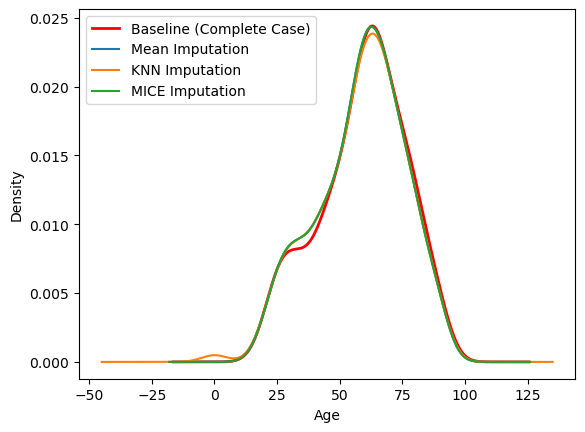

In [61]:
df_numeric_cc['Age'].plot(kind='kde', c='red', linewidth = 2)
df_numeric_mean['Age'].plot(kind='kde')
df_numeric_knn['Age'].plot(kind='kde')
df_numeric_mice['Age'].plot(kind='kde')

labels = ['Baseline (Complete Case)', 'Mean Imputation', 
          'KNN Imputation', 'MICE Imputation']

plt.legend(labels)
plt.xlabel('Age')

Text(0.5, 0, 'LOS')

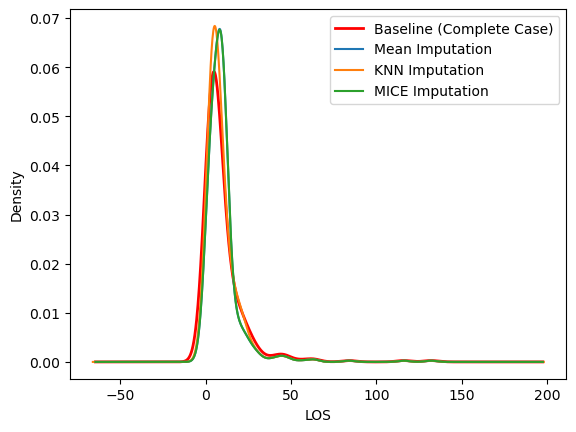

In [62]:
df_numeric_cc['LOS'].plot(kind='kde', c='red', linewidth = 2)
df_numeric_mean['LOS'].plot(kind='kde')
df_numeric_knn['LOS'].plot(kind='kde')
df_numeric_mice['LOS'].plot(kind='kde')

labels = ['Baseline (Complete Case)', 'Mean Imputation', 
          'KNN Imputation', 'MICE Imputation']

plt.legend(labels)
plt.xlabel('LOS')

Text(0.5, 0, 'ICU LOS')

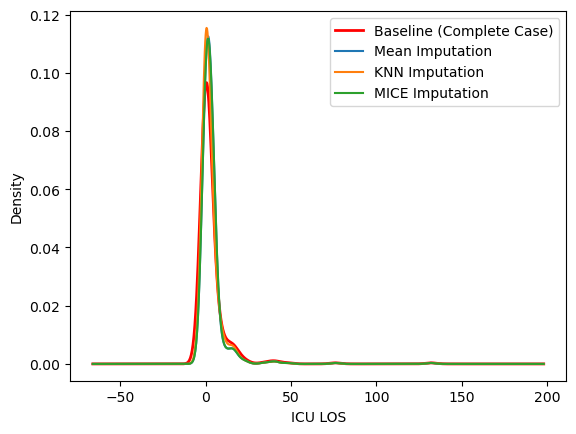

In [63]:
df_numeric_cc['ICU LOS'].plot(kind='kde', c='red', linewidth = 2)
df_numeric_mean['ICU LOS'].plot(kind='kde')
df_numeric_knn['ICU LOS'].plot(kind='kde')
df_numeric_mice['ICU LOS'].plot(kind='kde')

labels = ['Baseline (Complete Case)', 'Mean Imputation', 
          'KNN Imputation', 'MICE Imputation']

plt.legend(labels)
plt.xlabel('ICU LOS')

In [64]:
df_imputed = pd.concat([df_category_encoded_KNN, df_numeric_knn], axis = 1)
df_imputed

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition,Age,LOS,ICU LOS
1,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Mrsa,...,No,Bloodless,Female,Craniotomy,Medicaid Managed Care,Not Outlier,Hospice,78.0,5.000000,3.200000
5,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,ER,Covid Positive,...,No,Private Room,Male,Lymphoma,Medicare Managed Care,Not Outlier,Acute-Another Hosp,56.0,6.000000,3.000000
7,Accepted,Bakersfield Memorial,Citrus Valley,False,False,"Surgery, Otorhino",Telemetry,Surgical Evaluation/Surgery,Home,R/O Covid (Pui),...,No,Private Room,Female,Other General Medicine,Medicaid Managed Care,Not Outlier,Home Health Org,60.0,12.000000,8.200000
10,Accepted,Norris Cancer Hospital,Downey,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,ER,Mrsa,...,No,Private Room,Female,Infectious Disease,Managed Exchange,Not Outlier,Expired,53.0,2.000000,2.000000
11,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Telemetry,Orthopaedic Surgery,ER,Covid Positive,...,No,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,Not Outlier,Intermediate Care,42.0,9.250005,1.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Accepted,Valley Presbyterian,Downey,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,Covid Positive,...,No,Private Room,Female,Other Gi Medicine,Medicaid Managed Care,Outlier,Home/Self Care,63.0,6.000000,0.000000
991,Accepted,Verdugo Hills,Arcadia,False,False,Cardiology,Stepdown,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,No,Private Room,Female,Percutaneous Cardiac Procedures,Medicare,Not Outlier,Home/Self Care,75.0,2.000000,0.000000
995,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,No,Private Room,Female,Fracture/Injury,Medicare,Not Outlier,Home Health Org,46.0,5.000000,0.000000
997,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Med/Surg,Orthopaedic Surgery,Home,Immuno Compromised,...,No,Bloodless,Male,Hand Surgery,Medicaid,Outlier,Rehab,49.0,7.000007,0.000009


In [65]:
# df_imputed.to_excel('Imputed_Data_Full_Data.xlsx', index = False)

In [66]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the DataFrame with missing values
df_missing = df.copy()

# Create an imputer object using MICE
imp = IterativeImputer(random_state=42, estimator=RandomForestRegressor())

# Encode the category columns using an ordinal encoder
encoder = OrdinalEncoder()
cat_cols = df.select_dtypes(include=['object','bool']).columns.tolist()
df_missing[cat_cols] = encoder.fit_transform(df_missing[cat_cols])

# Impute the missing values using MICE
df_imputed = imp.fit_transform(df_missing)

# Convert the imputed array back to a pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_missing.columns)

# Decode the category columns using the same encoder
df_imputed[cat_cols] = encoder.inverse_transform(df_imputed[cat_cols])

In [67]:
df_imputed

,TC_ID,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS,ICU LOS,LOS Outlier,Discharge Disposition,Age
0,43.0,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Med/Surg,Orthopaedic Surgery,Acute Rehab,...,No,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,6.54,1.82,Not Outlier,Intermediate Care,78.0
1,155.0,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,Acute Rehab,...,No,Bloodless,Male,Lymphoma,Medicare Managed Care,6.00,3.00,Not Outlier,Acute-Another Hosp,56.0
2,340.0,Accepted,Bakersfield Memorial,Arcadia,False,False,"Surgery, Otorhino",ICU,Orthopaedic Surgery,Acute Rehab,...,No,Bloodless,Female,Hem-Oncology,Medicaid,6.13,1.56,Not Outlier,Home Health Org,60.0
3,433.0,Accepted,Norris Cancer Hospital,Arcadia,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,ER,...,No,Bloodless,Female,Infectious Disease,Managed Exchange,2.00,2.00,Not Outlier,Expired,53.0
4,440.0,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Med/Surg,Ohns/Ent,Acute Rehab,...,No,Bloodless,Female,Infectious Disease,Medicaid,6.58,1.40,Not Outlier,Expired,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,48195.0,Accepted,Valley Presbyterian,Apple Valley,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,...,No,Bloodless,Female,Other Gi Medicine,Medicaid Managed Care,6.00,0.00,Outlier,Home/Self Care,63.0
470,48256.0,Accepted,Verdugo Hills,Apple Valley,False,False,Cardiology,Stepdown,Ohns/Ent,Acute Rehab,...,No,Bloodless,Female,Percutaneous Cardiac Procedures,Medicare,2.00,0.00,Not Outlier,Home/Self Care,75.0
471,48420.0,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,...,No,Bloodless,Female,Fracture/Injury,Medicare,5.00,0.00,Not Outlier,Home Health Org,46.0
472,48526.0,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Med/Surg,Orthopaedic Surgery,ER,...,No,Bloodless,Female,Infectious Disease,Medicaid,6.23,0.14,Not Outlier,Home Health Org,49.0


In [68]:
df_imputed.to_excel('Imputed_MICE_RandomForest.xlsx',index = False)

In [69]:
df['County'].notnull().sum()

74

Column: Request Status
Original:
Non Missing Value Count 474
Accepted    474
Name: Request Status, dtype: int64


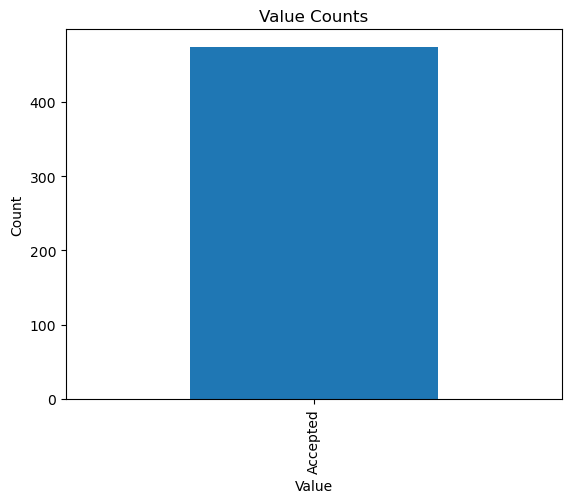

Imputed:
Non Missing Value Count 474
Accepted    474
Name: Request Status, dtype: int64


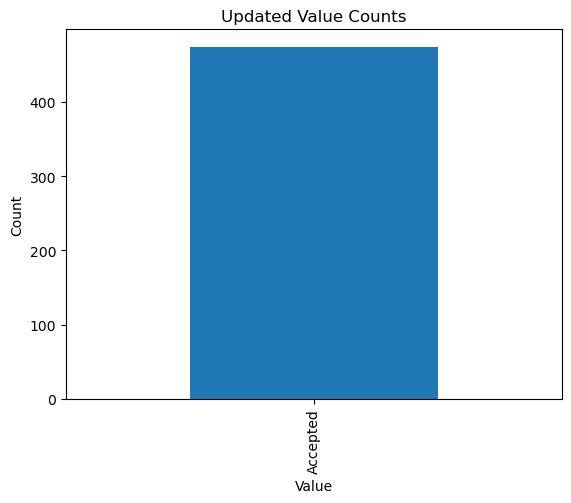

------------------
Column: Transfer Referral Source
Original:
Non Missing Value Count 474
Verdugo Hills                        65
County Lac Usc                       45
Norris Cancer Hospital               33
Bakersfield Memorial                 27
Ventura County Medical Center        20
Presbyterian Intercommunity (Pih)    19
Adventist Health Bakersfield         18
Huntington Memorial                  18
Beverly Hospital                     17
Inter-Community                      17
Kaweah Delta                         15
Martin Luther King                   15
Glendale Adventist                   15
White Memorial                       15
Pih Hospital                         14
Garfield                             13
Mercy Bakersfield                    11
Hollywood Presbyterian               10
Queen Of The Valley                   9
Antelope Valley Hospital              9
Methodist Hospital                    9
Whittier Medical Center               9
Valley Presbyterian           

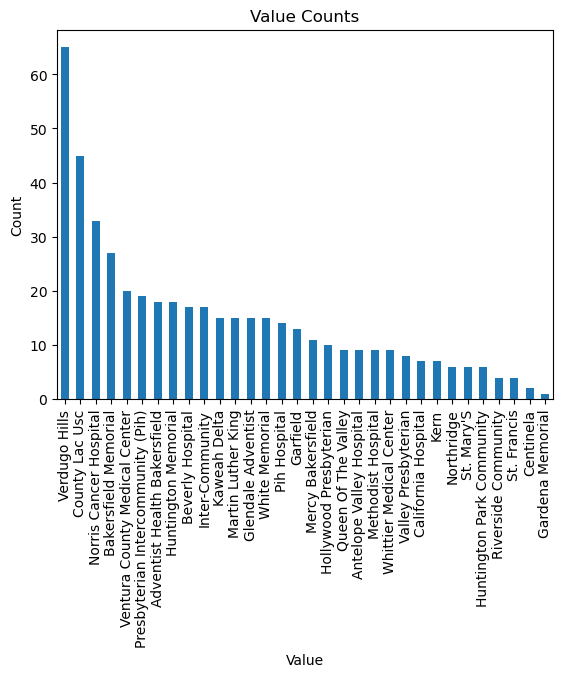

Imputed:
Non Missing Value Count 474
Verdugo Hills                        65
County Lac Usc                       45
Norris Cancer Hospital               33
Bakersfield Memorial                 27
Ventura County Medical Center        20
Presbyterian Intercommunity (Pih)    19
Adventist Health Bakersfield         18
Huntington Memorial                  18
Beverly Hospital                     17
Inter-Community                      17
Kaweah Delta                         15
Martin Luther King                   15
Glendale Adventist                   15
White Memorial                       15
Pih Hospital                         14
Garfield                             13
Mercy Bakersfield                    11
Hollywood Presbyterian               10
Queen Of The Valley                   9
Antelope Valley Hospital              9
Methodist Hospital                    9
Whittier Medical Center               9
Valley Presbyterian                   8
California Hospital                   7
Ker

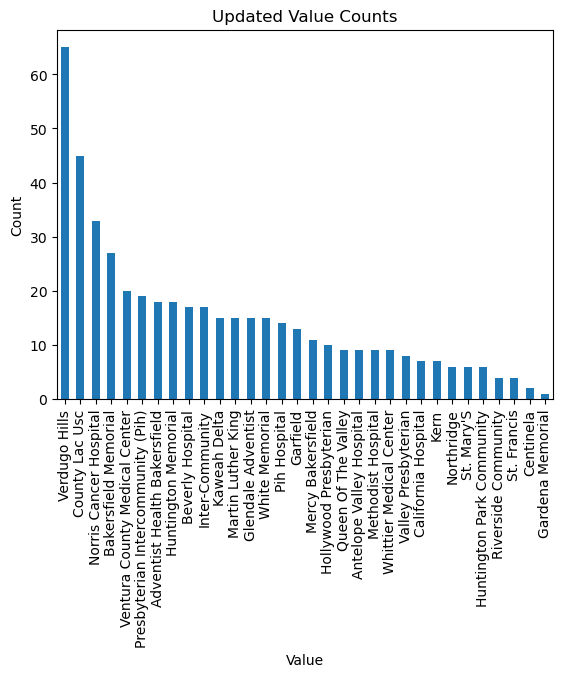

------------------
Column: County
Original:
Non Missing Value Count 74
 Citrus Valley    26
 Whittier         19
 Downey           14
 Arcadia           9
 Apple Valley      6
Name: County, dtype: int64


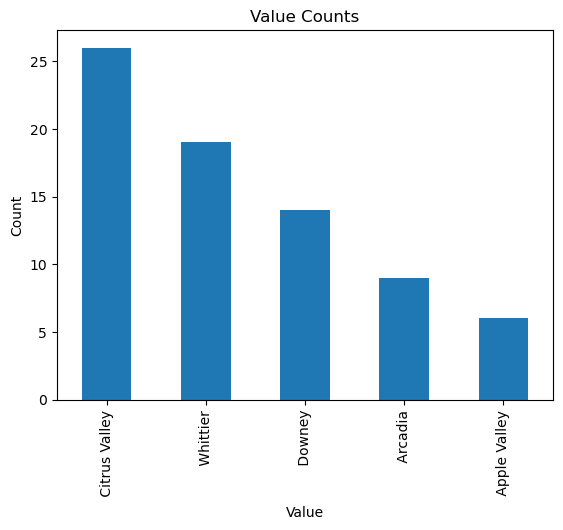

Imputed:
Non Missing Value Count 474
 Citrus Valley    217
 Apple Valley     127
 Arcadia           91
 Downey            20
 Whittier          19
Name: County, dtype: int64


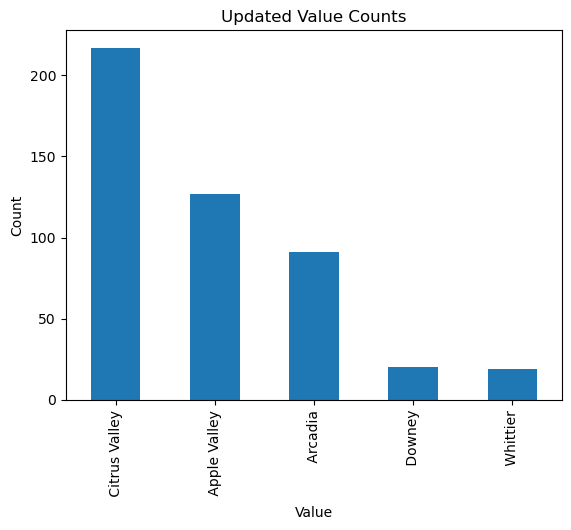

------------------
Column: Transfer Back Agreement
Original:
Non Missing Value Count 474
False    369
True     105
Name: Transfer Back Agreement, dtype: int64


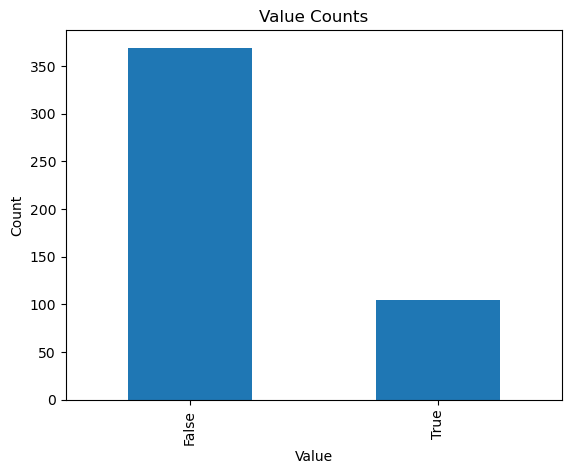

Imputed:
Non Missing Value Count 474
False    369
True     105
Name: Transfer Back Agreement, dtype: int64


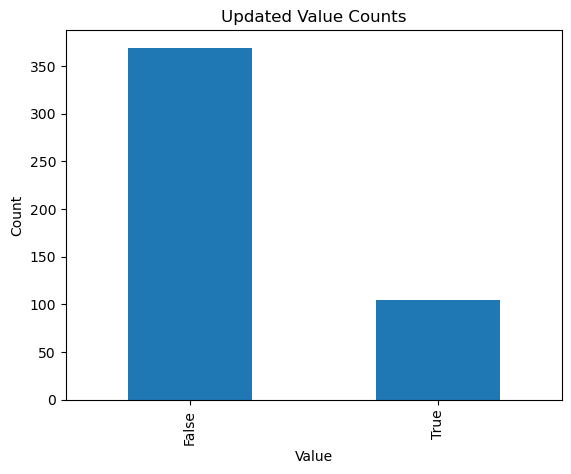

------------------
Column: LOA (Mark X if Yes)
Original:
Non Missing Value Count 474
False    453
True      21
Name: LOA (Mark X if Yes), dtype: int64


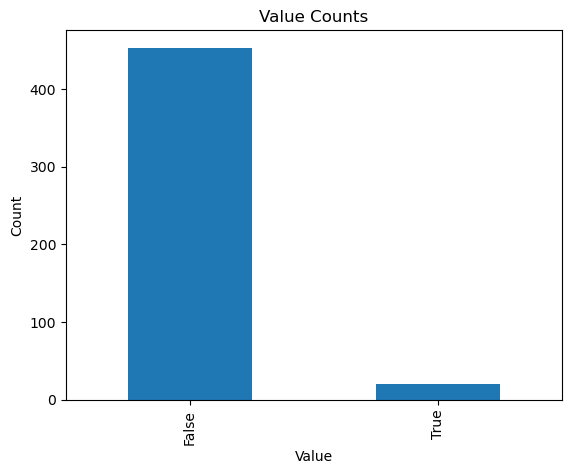

Imputed:
Non Missing Value Count 474
False    453
True      21
Name: LOA (Mark X if Yes), dtype: int64


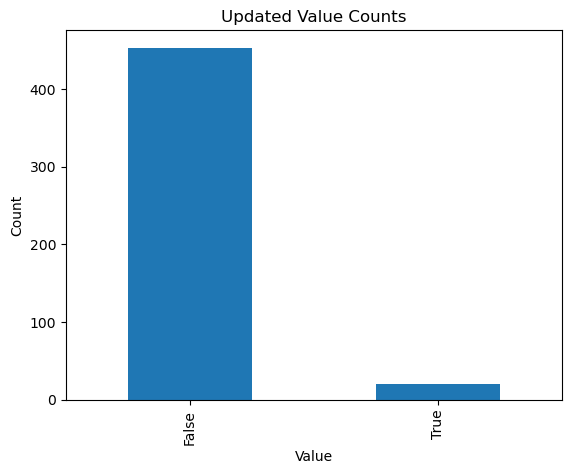

------------------
Column: Accepting Physician Specialty
Original:
Non Missing Value Count 473
Cardiology                                  56
Internal Medicin- Hospitalist               51
Surgery, Cardiova                           47
Gastroenterology - Transplant Hepatology    38
Surgery, General- Hepato                    33
Pulmonary Medici                            33
Surgery, Urologi                            22
Surgery, Otorhino                           20
Neurology-Stroke                            19
Surgery, Orthope                            17
Surgery, Vascula                            16
Surgery, Colorectal                         14
Surgery, Neurolo- Spine                     14
Surgery, Neurolo                            12
Nephrology                                  11
Surgery, General                             9
Gastroenterology                             8
Surgery, Thoraci                             7
Neurology- Hospitalist                       6
Surgery, Ort

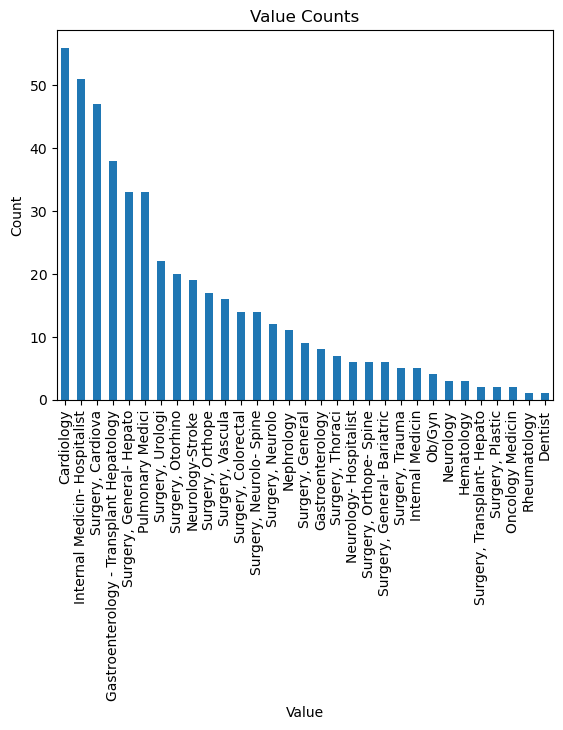

Imputed:
Non Missing Value Count 474
Cardiology                                  56
Internal Medicin- Hospitalist               52
Surgery, Cardiova                           47
Gastroenterology - Transplant Hepatology    38
Surgery, General- Hepato                    33
Pulmonary Medici                            33
Surgery, Urologi                            22
Surgery, Otorhino                           20
Neurology-Stroke                            19
Surgery, Orthope                            17
Surgery, Vascula                            16
Surgery, Colorectal                         14
Surgery, Neurolo- Spine                     14
Surgery, Neurolo                            12
Nephrology                                  11
Surgery, General                             9
Gastroenterology                             8
Surgery, Thoraci                             7
Neurology- Hospitalist                       6
Surgery, Orthope- Spine                      6
Surgery, General- Baria

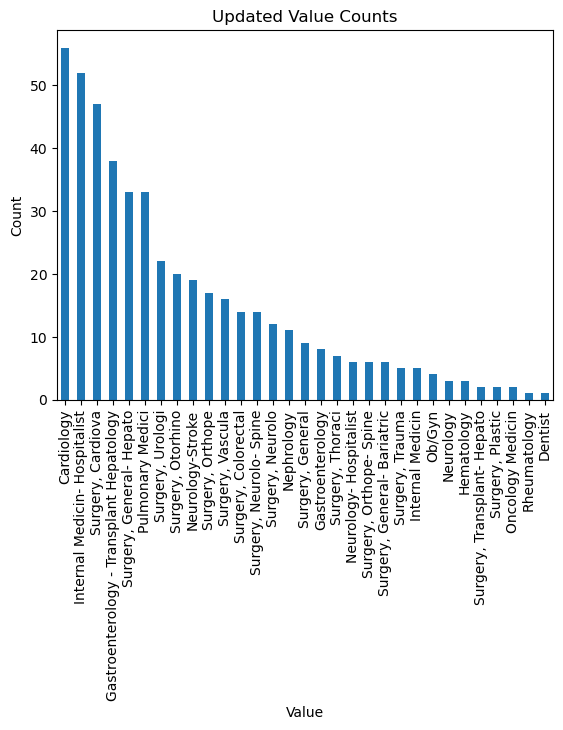

------------------
Column: Required Level Of Care
Original:
Non Missing Value Count 295
Telemetry    118
Med/Surg      98
ICU           66
Stepdown      13
Name: Required Level Of Care, dtype: int64


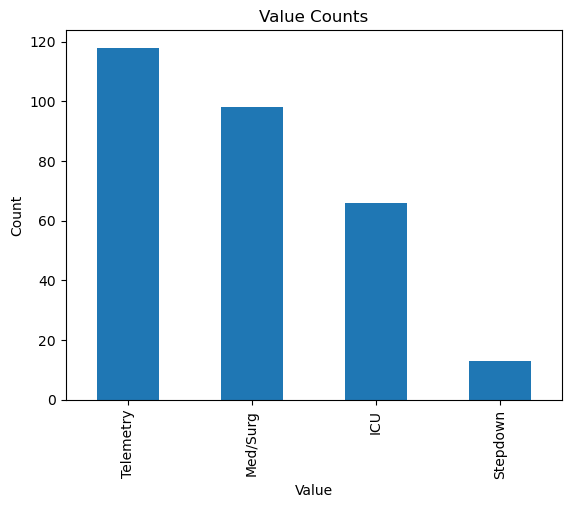

Imputed:
Non Missing Value Count 474
Med/Surg     194
Telemetry    118
Stepdown      88
ICU           74
Name: Required Level Of Care, dtype: int64


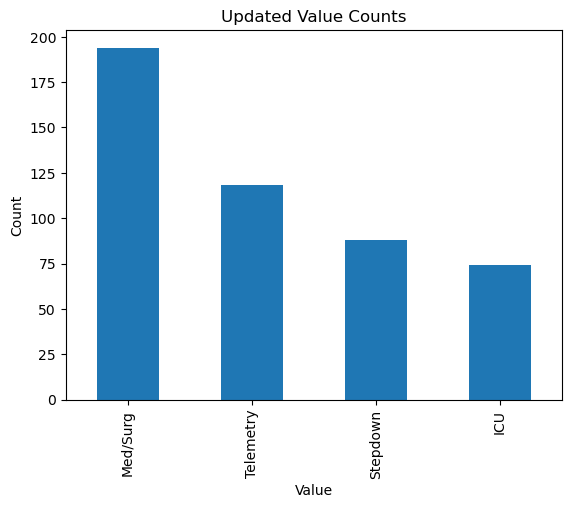

------------------
Column: Requested Treatment Intervention
Original:
Non Missing Value Count 174
Surgical Evaluation/Surgery        119
Medical Management/Optimization     50
Orthopaedic Surgery                  2
Ohns/Ent                             1
Gastroenterology                     1
Thoracic Surgery                     1
Name: Requested Treatment Intervention, dtype: int64


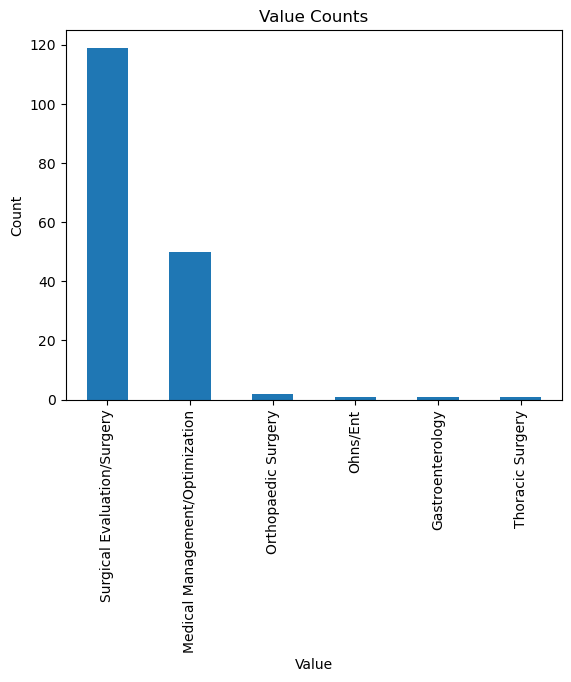

Imputed:
Non Missing Value Count 474
Orthopaedic Surgery                185
Surgical Evaluation/Surgery        119
Ohns/Ent                           114
Medical Management/Optimization     54
Gastroenterology                     1
Thoracic Surgery                     1
Name: Requested Treatment Intervention, dtype: int64


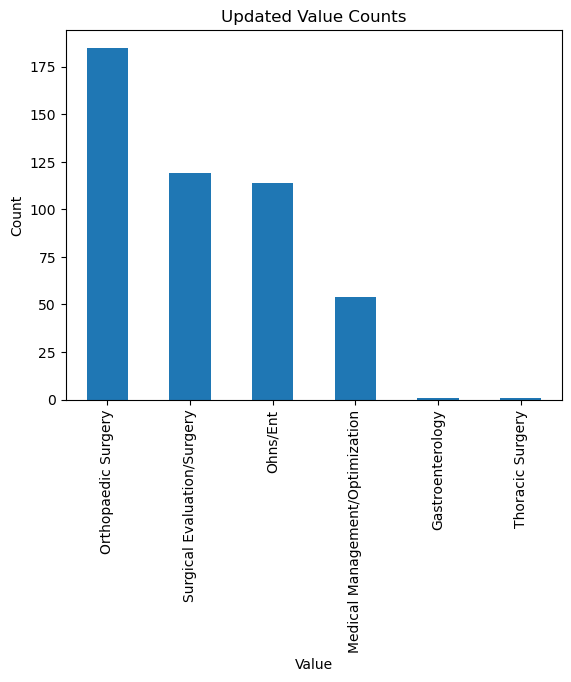

------------------
Column: From Where Patient Admitted to Referring Facility
Original:
Non Missing Value Count 140
Home              59
Acute Hospital    38
ER                36
SNF                5
Acute Rehab        2
Name: From Where Patient Admitted to Referring Facility, dtype: int64


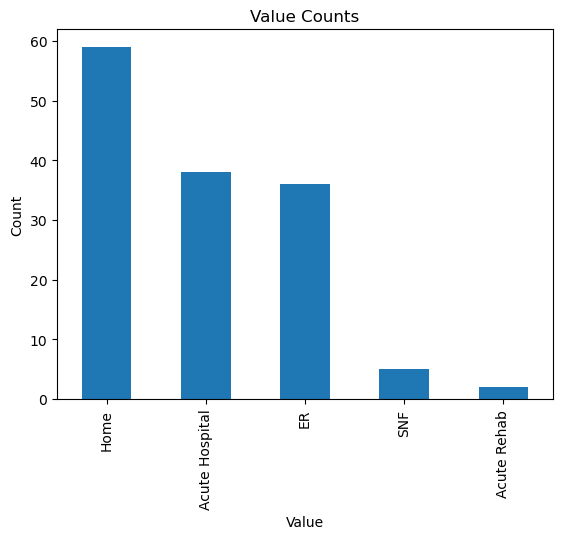

Imputed:
Non Missing Value Count 474
Acute Rehab       198
ER                154
Home               59
Acute Hospital     58
SNF                 5
Name: From Where Patient Admitted to Referring Facility, dtype: int64


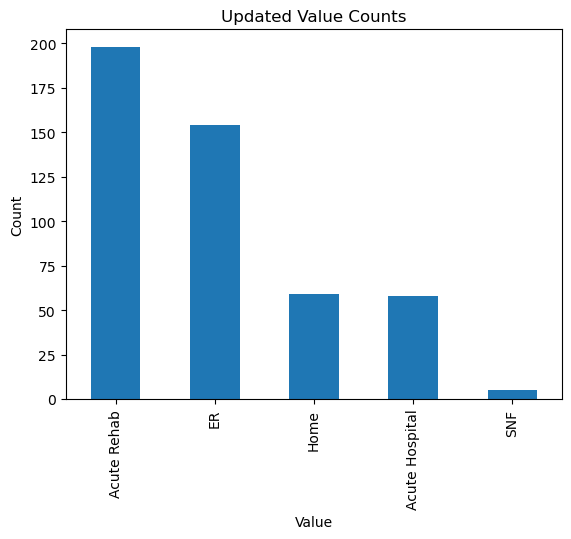

------------------
Column: Infection Precaution
Original:
Non Missing Value Count 27
Covid Positive               12
Immuno Compromised            5
Other - Specified In Hloc     4
R/O Covid (Pui)               2
Mrsa                          1
C. Auris                      1
App-90                        1
Cdiff                         1
Name: Infection Precaution, dtype: int64


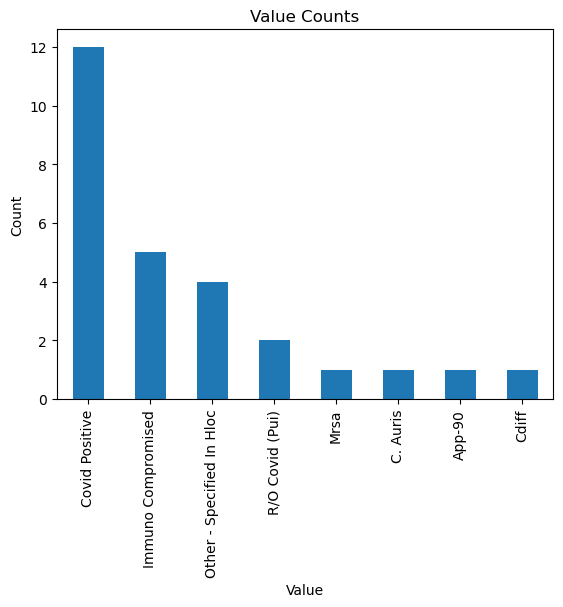

Imputed:
Non Missing Value Count 474
Covid Positive               276
Immuno Compromised           174
Cdiff                         13
Other - Specified In Hloc      4
Mrsa                           3
R/O Covid (Pui)                2
C. Auris                       1
App-90                         1
Name: Infection Precaution, dtype: int64


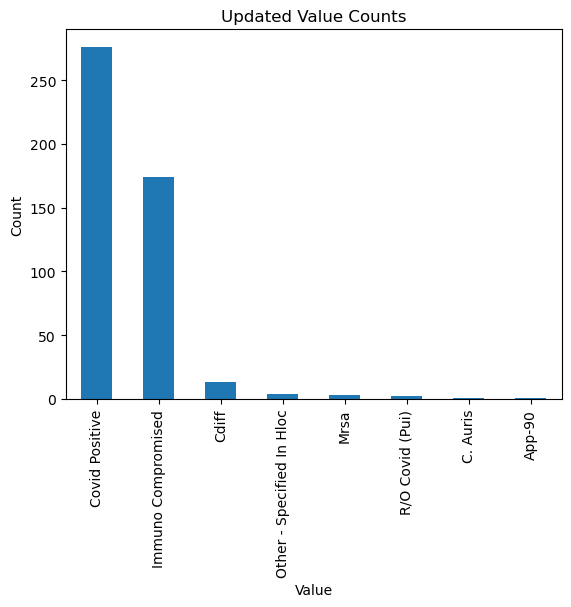

------------------
Column: Patient Status
Original:
Non Missing Value Count 253
Inpatient    189
ER            64
Name: Patient Status, dtype: int64


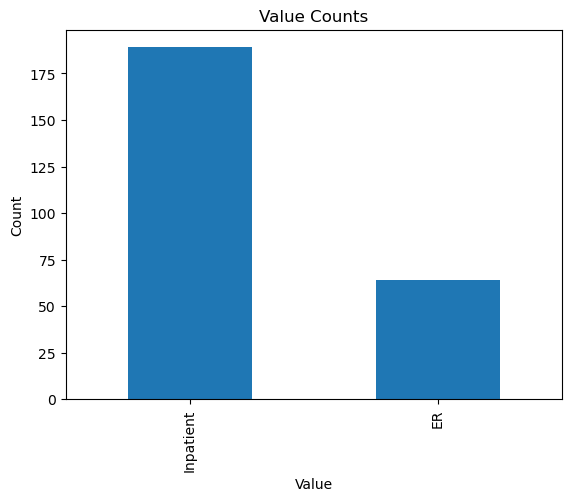

Imputed:
Non Missing Value Count 474
ER           270
Inpatient    204
Name: Patient Status, dtype: int64


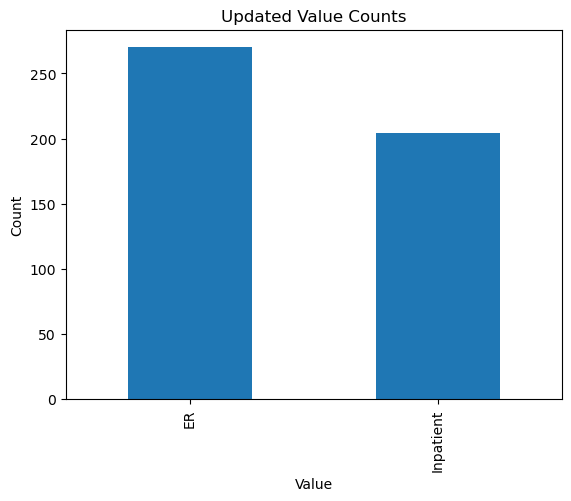

------------------
Column: EMTALA Y/N(Patient Status Details)
Original:
Non Missing Value Count 474
No     467
Yes      7
Name: EMTALA Y/N(Patient Status Details), dtype: int64


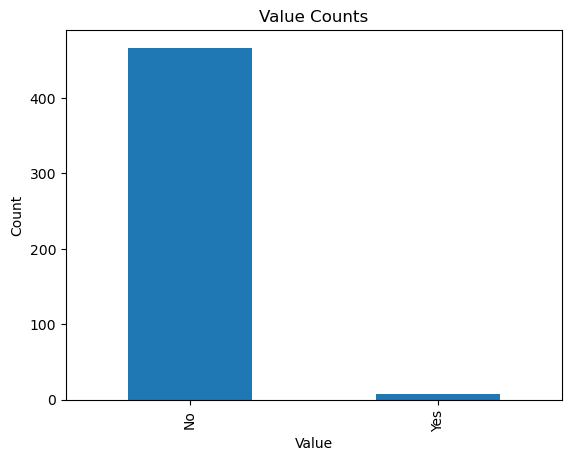

Imputed:
Non Missing Value Count 474
No     467
Yes      7
Name: EMTALA Y/N(Patient Status Details), dtype: int64


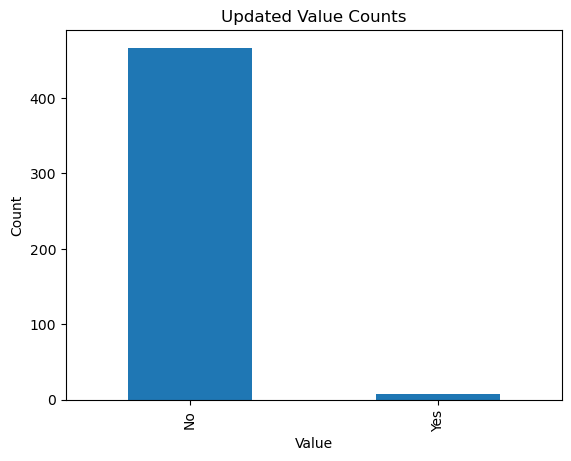

------------------
Column: Special Considerations
Original:
Non Missing Value Count 2
Private Room    1
Bloodless       1
Name: Special Considerations, dtype: int64


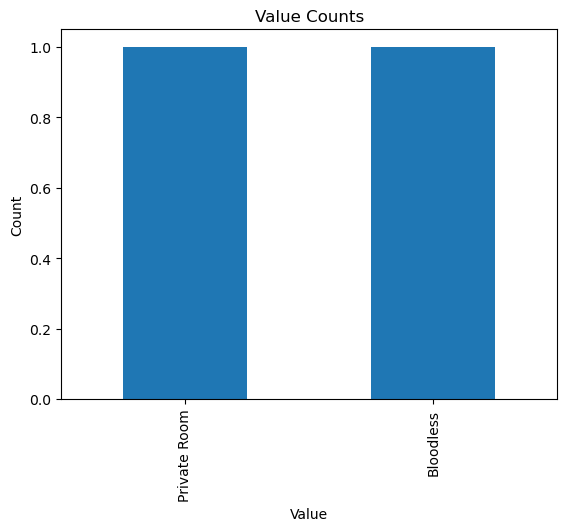

Imputed:
Non Missing Value Count 474
Bloodless       473
Private Room      1
Name: Special Considerations, dtype: int64


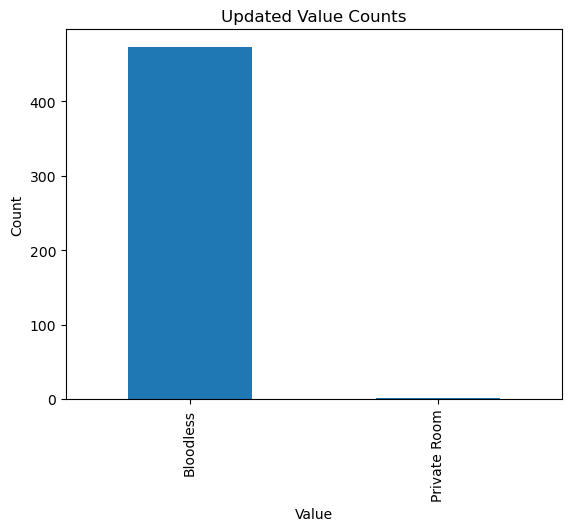

------------------
Column: Gender
Original:
Non Missing Value Count 254
Male      144
Female    109
Other       1
Name: Gender, dtype: int64


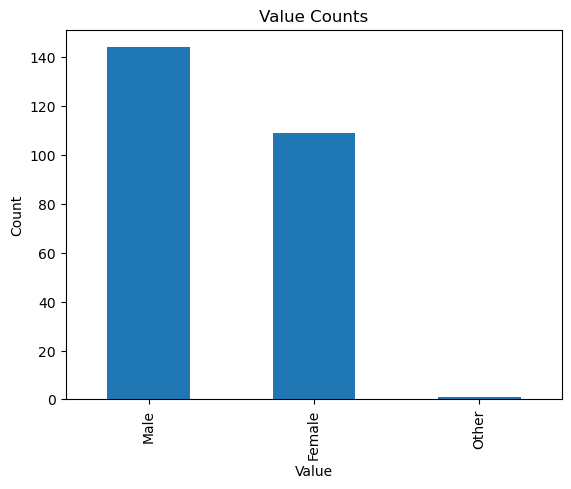

Imputed:
Non Missing Value Count 474
Female    329
Male      144
Other       1
Name: Gender, dtype: int64


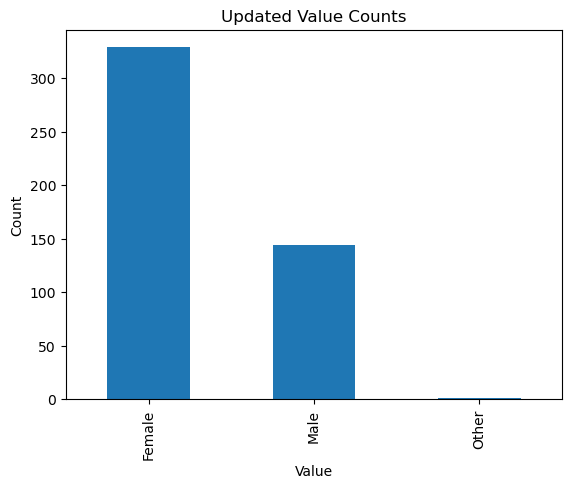

------------------
Column: DRG Program
Original:
Non Missing Value Count 330
Other General Medicine     19
-                          17
Other Gi Medicine          16
Hepatobiliary Disorders    15
Digestive Cancer           13
                           ..
Respiratory Oncology        1
Back/Neck Procedures        1
Hem-Oncology                1
Extracranial Procedures     1
Cranial Surgery             1
Name: DRG Program, Length: 68, dtype: int64


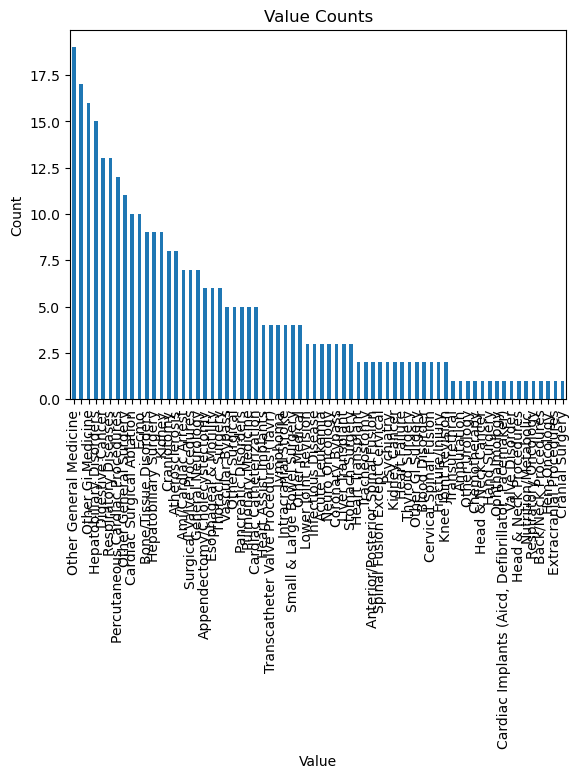

Imputed:
Non Missing Value Count 474
Kidney                                               29
Hepatobiliary Disorders                              24
Hepatobiliary Surgery                                20
Infectious Disease                                   19
Other General Medicine                               19
                                                     ..
Cardiac Implants (Aicd, Defibrillator, Pacemaker)     1
Transurethral                                         1
Respiratory Oncology                                  1
Back/Neck Procedures                                  1
Cranial Surgery                                       1
Name: DRG Program, Length: 68, dtype: int64


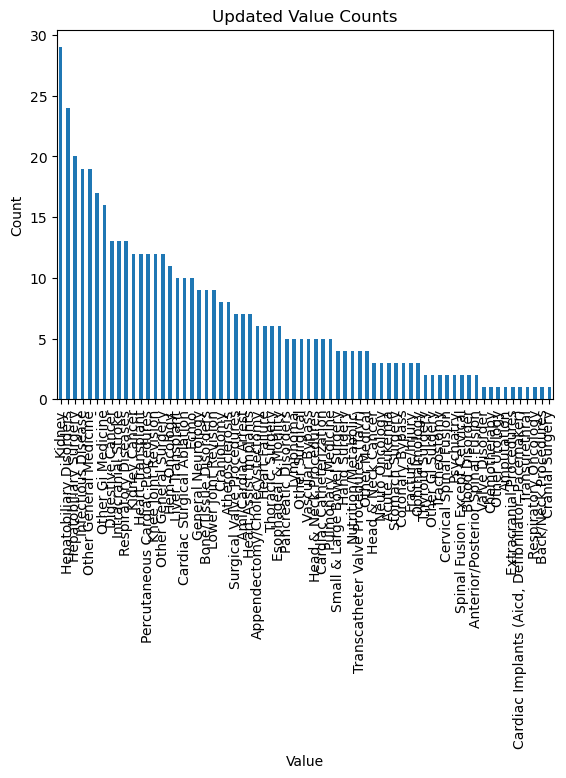

------------------
Column: Payor
Original:
Non Missing Value Count 330
Medicare                 120
Medicaid Managed Care     62
Managed Care              55
Medicare Managed Care     50
Medicaid                  27
Managed Exchange          12
Other                      4
Name: Payor, dtype: int64


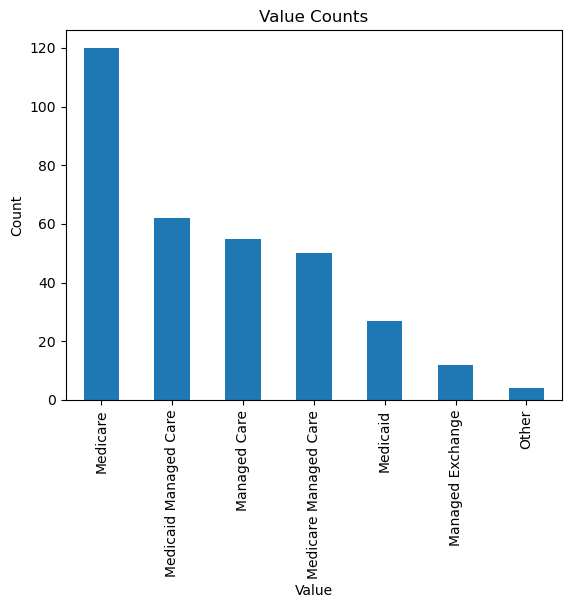

Imputed:
Non Missing Value Count 474
Medicare                 165
Medicaid Managed Care     97
Medicaid                  86
Managed Care              55
Medicare Managed Care     50
Managed Exchange          17
Other                      4
Name: Payor, dtype: int64


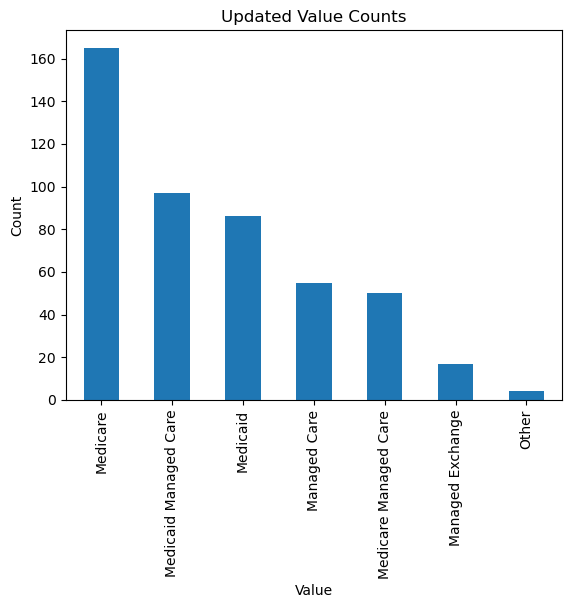

------------------
Column: LOS Outlier
Original:
Non Missing Value Count 330
Not Outlier    225
Outlier        105
Name: LOS Outlier, dtype: int64


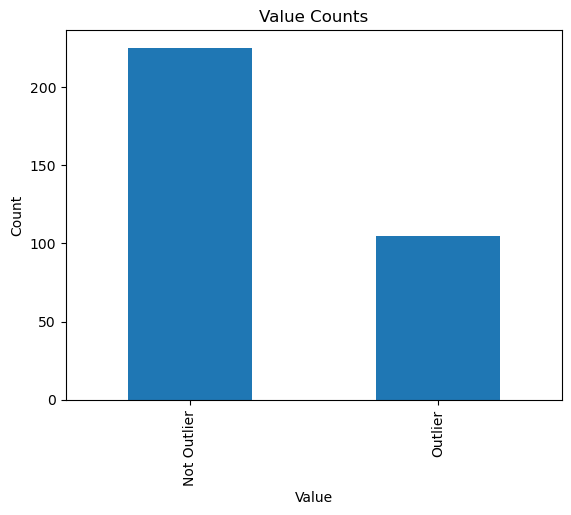

Imputed:
Non Missing Value Count 474
Not Outlier    369
Outlier        105
Name: LOS Outlier, dtype: int64


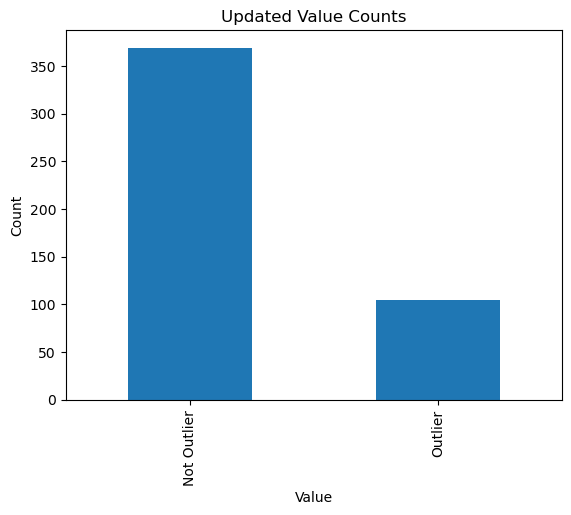

------------------
Column: Discharge Disposition
Original:
Non Missing Value Count 330
Home/Self Care        153
Home Health Org        67
SNF                    31
Expired                24
Acute-Another Hosp     21
Rehab                  13
Short Term              7
Long Term Care          5
Hospice                 5
Other                   3
Intermediate Care       1
Name: Discharge Disposition, dtype: int64


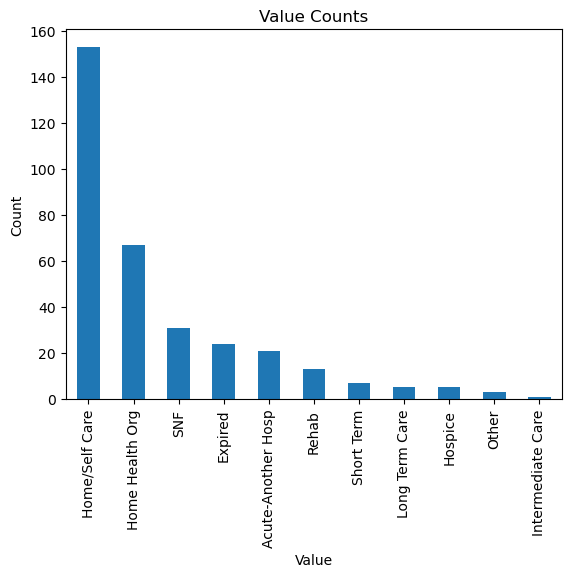

Imputed:
Non Missing Value Count 474
Home/Self Care        198
Home Health Org       115
Hospice                35
SNF                    31
Expired                29
Acute-Another Hosp     21
Intermediate Care      16
Rehab                  13
Short Term              7
Long Term Care          6
Other                   3
Name: Discharge Disposition, dtype: int64


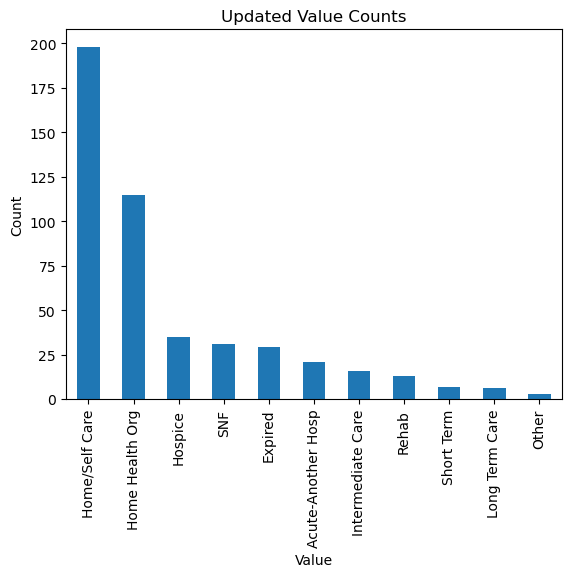

------------------


In [70]:
for col in cat_cols:
    print(f'Column: {col}')
    print('Original:')
    print('Non Missing Value Count', df[col].notnull().sum())
    print(df[col].value_counts())
    
    counts = df[col].value_counts()
    # Plot a histogram of the value counts
    counts.plot(kind='bar')
    # Set the chart title and axis labels
    plt.title('Value Counts')
    plt.xlabel('Value')
    plt.ylabel('Count')
    # Show the chart
    plt.show()

    print('Imputed:')
    print('Non Missing Value Count', df_imputed[col].notnull().sum())
    print(df_imputed[col].value_counts())
    
    imputed_counts = df_imputed[col].value_counts()
    # Plot a histogram of the value counts
    imputed_counts.plot(kind='bar')
    # Set the chart title and axis labels
    plt.title('Updated Value Counts')
    plt.xlabel('Value')
    plt.ylabel('Count')
    # Show the chart
    plt.show()
    print('------------------')

In [71]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the DataFrame with missing values
df_missing = df.copy()

# Separate numeric and category columns
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object','bool']).columns.tolist()

# Encode category columns using an ordinal encoder
encoder = OrdinalEncoder()
df_missing[cat_cols] = encoder.fit_transform(df_missing[cat_cols])

# Impute the missing values using kNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_missing)

# Convert the imputed array back to a pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_missing.columns)

# Decode the category columns using the same encoder
df_imputed[cat_cols] = encoder.inverse_transform(df_imputed[cat_cols])

In [72]:
df_imputed

,TC_ID,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS,ICU LOS,LOS Outlier,Discharge Disposition,Age
0,43.0,Accepted,Mercy Bakersfield,Downey,True,False,"Surgery, Colorectal",Med/Surg,Ohns/Ent,Acute Rehab,...,No,Bloodless,Female,Head & Neck Procedures,Medicaid Managed Care,20.6,6.8,Not Outlier,Acute-Another Hosp,78.0
1,155.0,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,Acute Rehab,...,No,Bloodless,Male,Lymphoma,Medicare Managed Care,6.0,3.0,Not Outlier,Acute-Another Hosp,56.0
2,340.0,Accepted,Bakersfield Memorial,Downey,False,False,"Surgery, Otorhino",Med/Surg,Ohns/Ent,Acute Rehab,...,No,Bloodless,Female,Head & Neck Procedures,Medicaid Managed Care,20.6,6.8,Not Outlier,Acute-Another Hosp,60.0
3,433.0,Accepted,Norris Cancer Hospital,Downey,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,Acute Rehab,...,No,Bloodless,Female,Infectious Disease,Managed Exchange,2.0,2.0,Not Outlier,Expired,53.0
4,440.0,Accepted,Hollywood Presbyterian,Downey,False,False,Nephrology,Med/Surg,Ohns/Ent,Acute Rehab,...,No,Bloodless,Female,Head & Neck Procedures,Medicaid Managed Care,20.6,6.8,Not Outlier,Acute-Another Hosp,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,48195.0,Accepted,Valley Presbyterian,Citrus Valley,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,...,No,Bloodless,Female,Other Gi Medicine,Medicaid Managed Care,6.0,0.0,Outlier,Home/Self Care,63.0
470,48256.0,Accepted,Verdugo Hills,Citrus Valley,False,False,Cardiology,Stepdown,Orthopaedic Surgery,ER,...,No,Bloodless,Female,Percutaneous Cardiac Procedures,Medicare,2.0,0.0,Not Outlier,Home/Self Care,75.0
471,48420.0,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,...,No,Bloodless,Female,Fracture/Injury,Medicare,5.0,0.0,Not Outlier,Home Health Org,46.0
472,48526.0,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Stepdown,Orthopaedic Surgery,ER,...,No,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,8.0,0.4,Not Outlier,Home/Self Care,49.0


In [73]:
df_imputed.to_excel("Imputed_KNN.xlsx", index=False)

<AxesSubplot:>

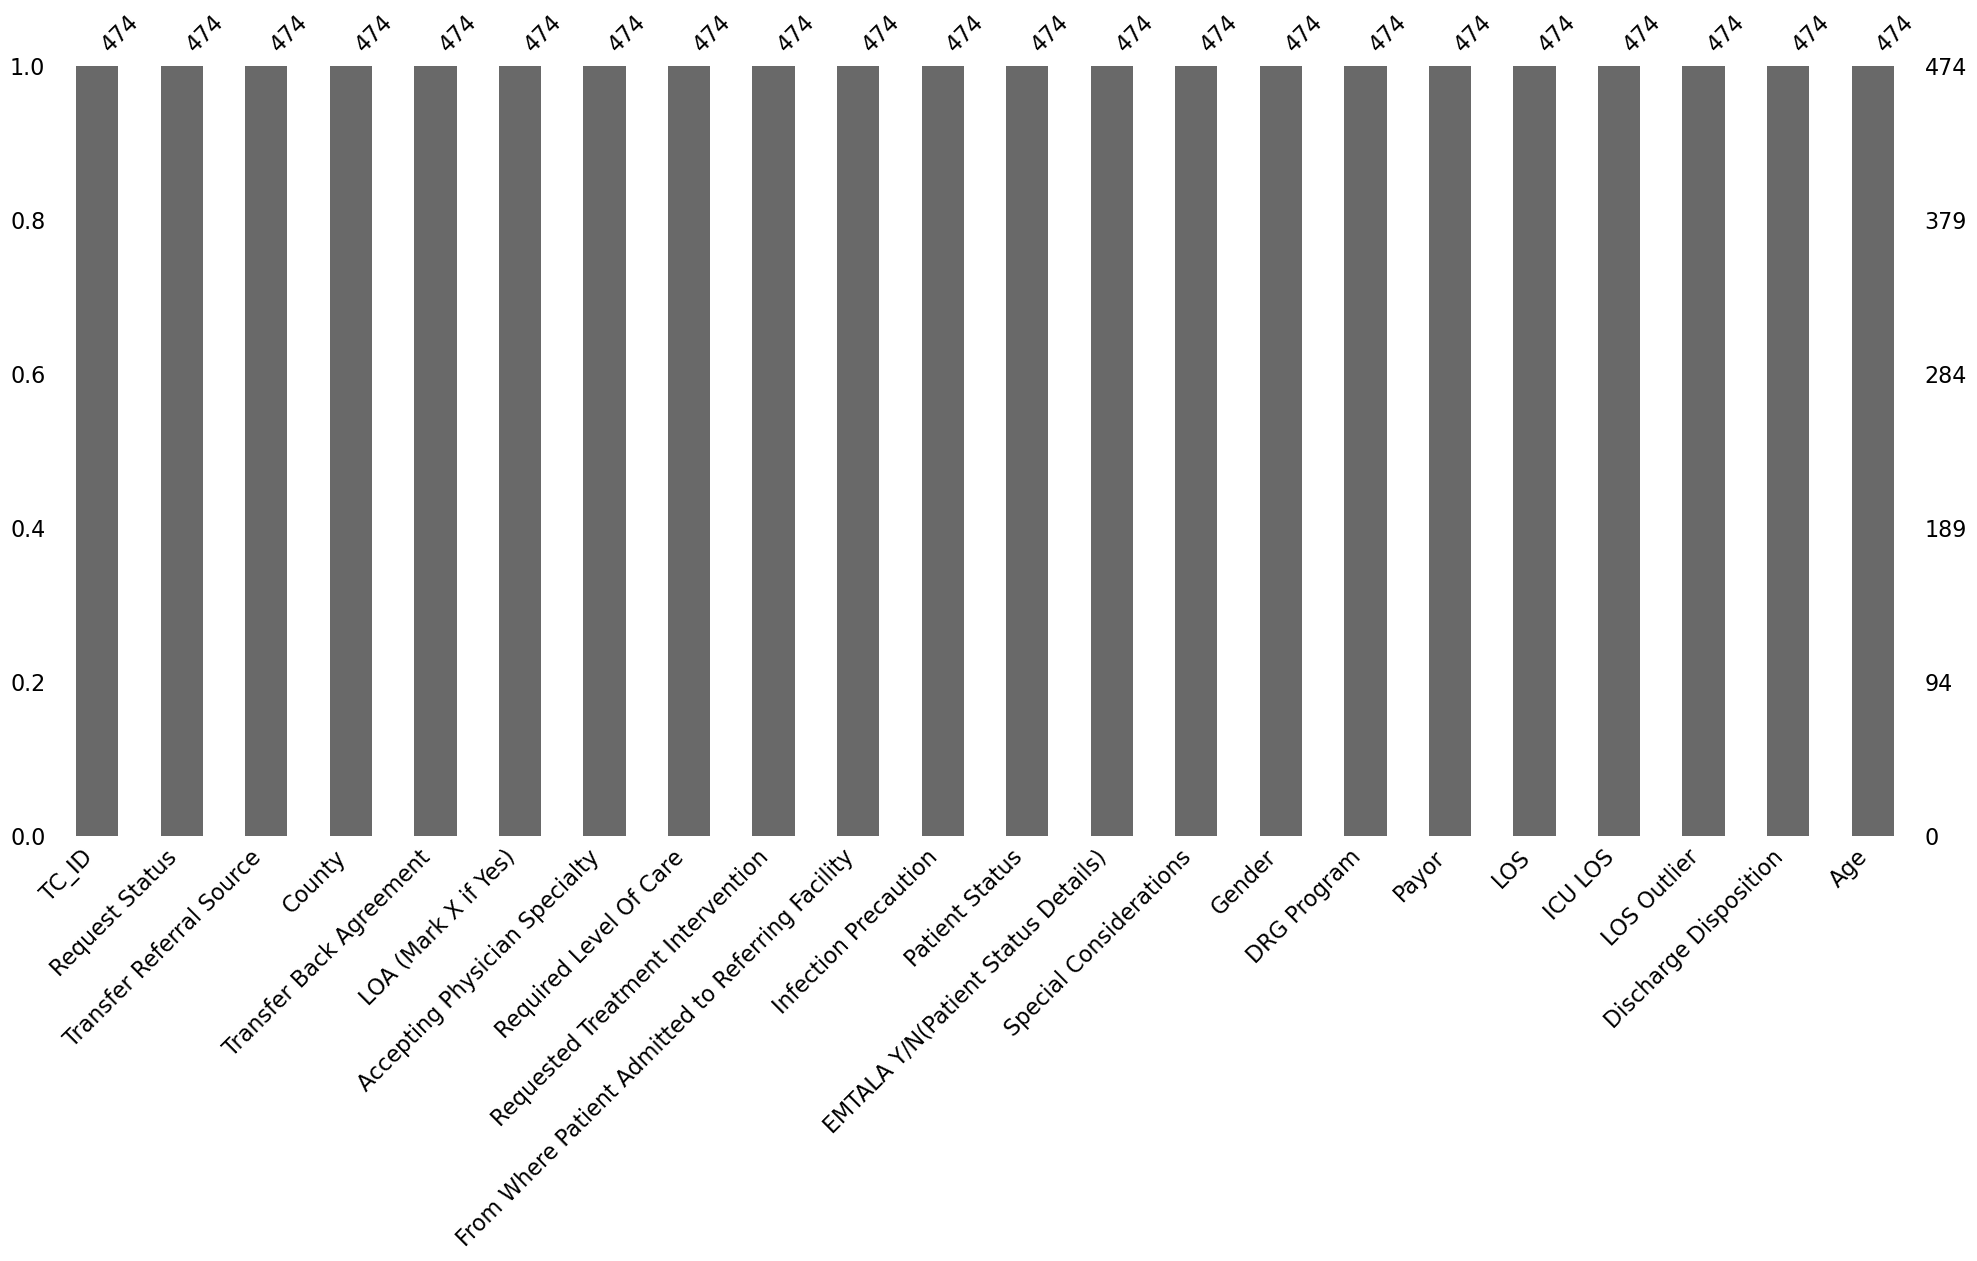

In [74]:
msno.bar(df_imputed)